In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\p.c\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data=pd.read_excel("D:/fliprobo/project/P1/Customer_retention_dataset_1/Customer_retention_dataset/Customer_retention_dataset.xlsx")
data.head().T

,0,1,2,3,4
1Gender of respondent,Male,Female,Female,Male,Female
2 How old are you?,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years
3 Which city do you shop online from?,Delhi,Delhi,Greater Noida,Karnal,Bangalore
4 What is the Pin Code of where you shop online from?,110009,110030,201308,132001,530068
5 Since How Long You are Shopping Online ?,Above 4 years,Above 4 years,3-4 years,3-4 years,2-3 years
...,...,...,...,...,...
Longer delivery period,Paytm.com,Snapdeal.com,Paytm.com,Paytm.com,Paytm.com
Change in website/Application design,Flipkart.com,Amazon.in,Paytm.com,"Amazon.in, Flipkart.com",Amazon.in
Frequent disruption when moving from one page to another,Amazon.in,Myntra.com,Paytm.com,"Amazon.in, Flipkart.com",Snapdeal.com
Website is as efficient as before,Amazon.in,"Amazon.in, Flipkart.com",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com",Paytm.com


In [3]:
data.columns.tolist()

['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '4 What is the Pin Code of where you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                          

the columns names are not clear we have to use strip the columns name.

In [4]:
for col in data:
    data.rename(columns = {col:col.strip()}, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   1Gender of respondent                                                                                         269 non-null    object
 1   2 How old are you?                                                                                            269 non-null    object
 2   3 Which city do you shop online from?                                                                         269 non-null    object
 3   4 What is the Pin Code of where you shop online from?                                                         269 non-null    int64 
 4   5 Since How Long You are Shopping Online ?                    

There 71 columns all are of object type columns while the pincode is of int type that is location code for the Customer.

In [6]:
for col in data:
    print(f"{col}::\n----------\nUnique values::{data[col].unique()}\n----------\n")

1Gender of respondent::
----------
Unique values::['Male' 'Female']
----------

2 How old are you?::
----------
Unique values::['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
----------

3 Which city do you shop online from?::
----------
Unique values::['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
----------

4 What is the Pin Code of where you shop online from?::
----------
Unique values::[110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]
----------

5 Since How Long You are Shopping Online ?::
----------
Unique values::['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']
----------

6 How many times you have made an online pur

Customer uses Internet while shopping the Unique values are same for mobile internet and Mobile Internet. Replacing these values.

In [7]:
data['7 How do you access the internet while shopping on-line?']=data['7 How do you access the internet while shopping on-line?'].replace({"Mobile internet":"Mobile Internet"})

In [8]:
data['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [9]:
data.shape

(269, 71)

There are now 269 no. of records.

In [10]:
data.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [11]:
## its hides some columns.

In [12]:
for col in data:
    print(col) 
    print(data[col].isnull().sum()) 
    print("-"*40)
    print("-"*40)

1Gender of respondent
0
----------------------------------------
----------------------------------------
2 How old are you?
0
----------------------------------------
----------------------------------------
3 Which city do you shop online from?
0
----------------------------------------
----------------------------------------
4 What is the Pin Code of where you shop online from?
0
----------------------------------------
----------------------------------------
5 Since How Long You are Shopping Online ?
0
----------------------------------------
----------------------------------------
6 How many times you have made an online purchase in the past 1 year?
0
----------------------------------------
----------------------------------------
7 How do you access the internet while shopping on-line?
0
----------------------------------------
----------------------------------------
8 Which device do you use to access the online shopping?
0
----------------------------------------
---------

there is no null value in dataset.

In [13]:
data.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


Showing statistical description of pincode.

In [14]:
for col in data:
    print(col) 
    print(data[col].value_counts()) 
    print("-"*40)
    print("-"*40)

1Gender of respondent
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
----------------------------------------
----------------------------------------
2 How old are you?
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you?, dtype: int64
----------------------------------------
----------------------------------------
3 Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
----------------------------------------
----------------------------------------
4 What is the Pin Code of where you shop online from?
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
13203

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64
----------------------------------------
----------------------------------------
46 Shopping on the website helps you fulfill certain roles
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64
----------------------------------------
----------------------------------------
47 Getting value for money spent
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64
----------------------------------------
----------------------------------------
From the following, tick any (or all) of the online retailers you have shopped from;
A

Showing noo.of each category of all columns.

In [15]:
customerDetails=data.iloc[:,:7]         # sepearating data for taking details of Customer
deviceDeatils=data.iloc[:,7:11]         # Taking Deatails of device seperately
firstVisit=data.iloc[:,11:15]           # FirstVisit of customer through which platform
abondon=data.iloc[:,15:17]              # customer abondon the products reasons
services=data.iloc[:,17:47]             # Sevices of customer
onlineReatilers=data.iloc[:,47:]        # Online retailers feedback by customer details.

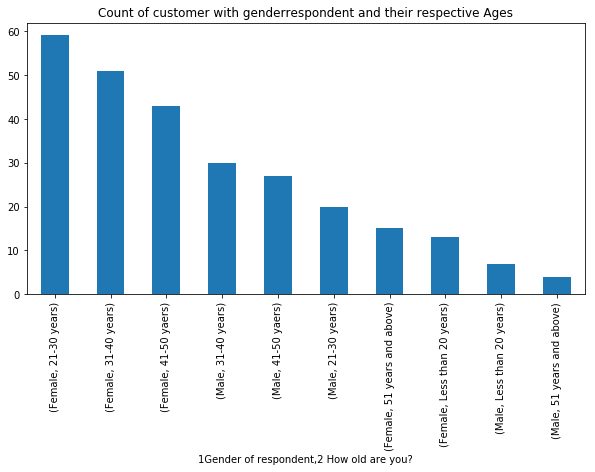

In [22]:
fig=plt.figure(figsize=(10,5))
data[['1Gender of respondent',""'2 How old are you?']].value_counts().plot(kind='bar')
plt.title("Count of customer with genderrespondent and their respective Ages")
plt.show()
fig.savefig('Count of customer with genderrespondent and their respective Ages.jpg')

Female Customer of 21-30years old are using online shopping more than any others.

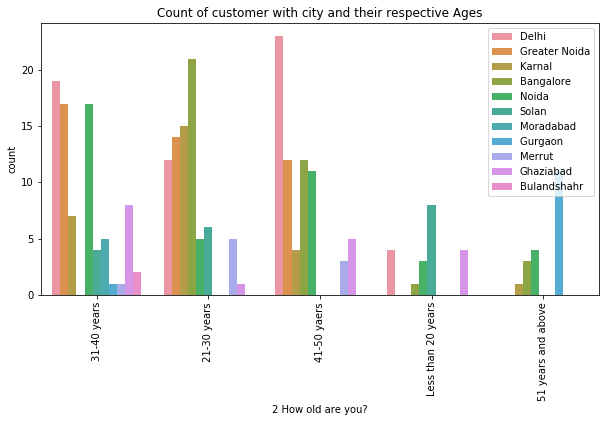

In [25]:
fig=plt.figure(figsize=(10,5))
sns.countplot(data['2 How old are you?'],hue=data["3 Which city do you shop online from?"])
plt.xticks(rotation=90)
plt.title("Count of customer with city and their respective Ages")
plt.legend(loc=1)
plt.show()

41-50 years ages of customer from Delhi has high no. of customers.

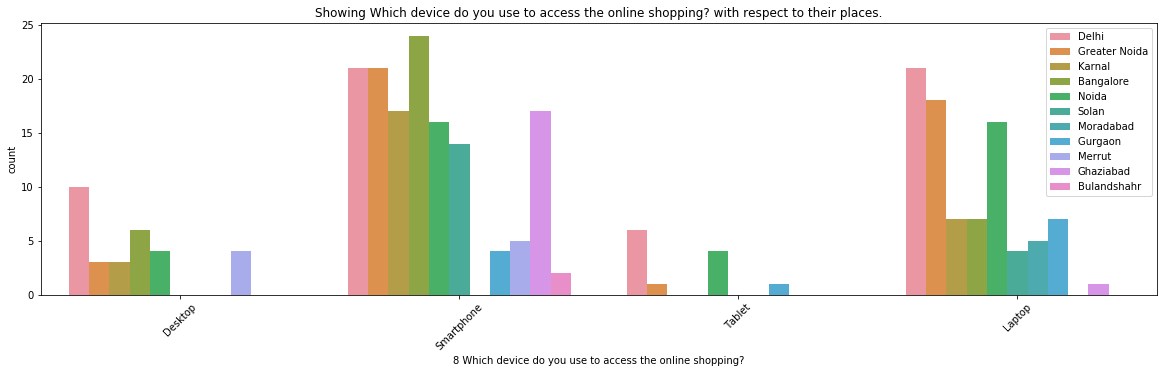

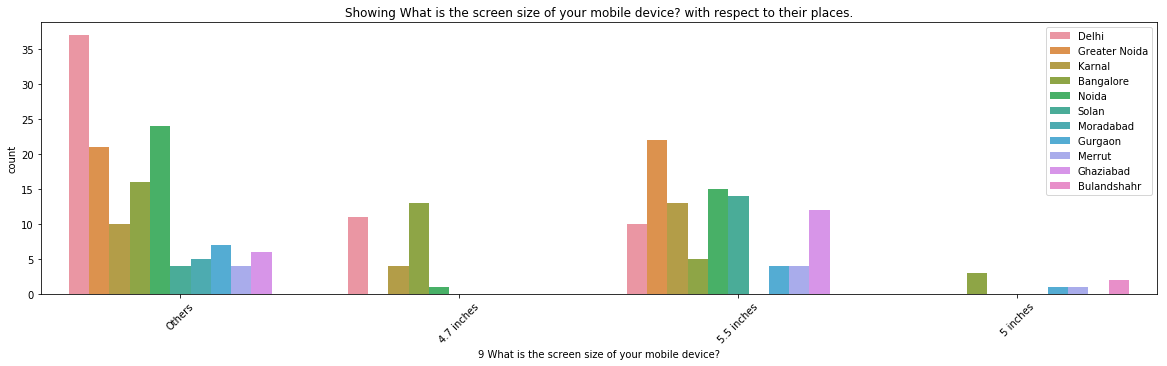

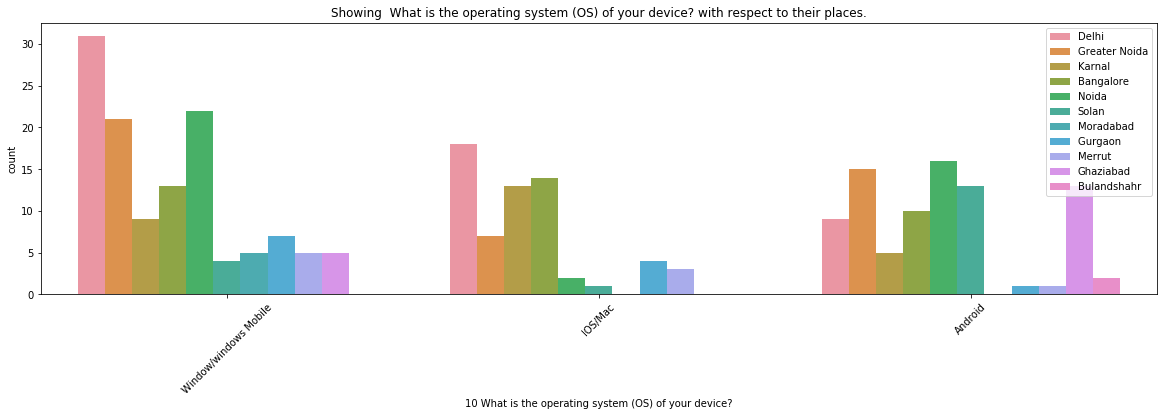

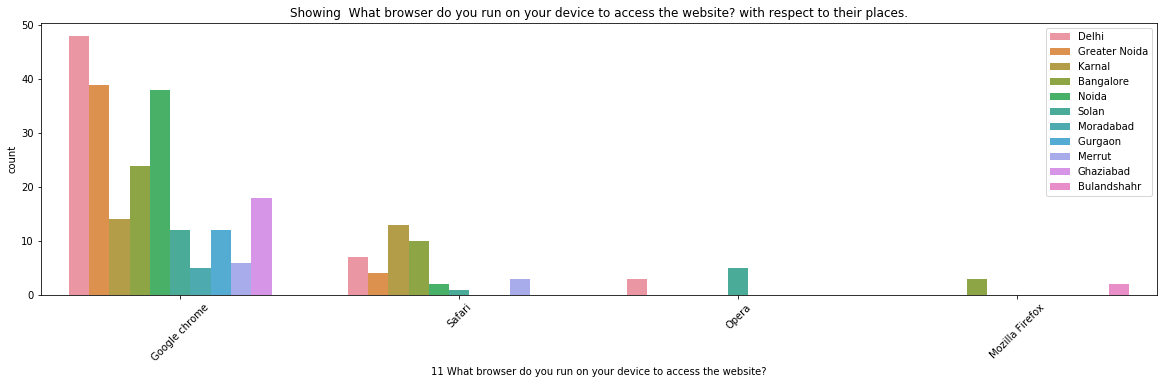

In [28]:
for col in deviceDeatils:
    fig=plt.figure(figsize=(20,5))
    sns.countplot(data[col],hue=data["3 Which city do you shop online from?"])
    plt.xticks(rotation=45)
    plt.title("Showing "+col[2:]+" with respect to their places.")
    plt.legend(loc=1)
    plt.show()

Screen size are not useful to know which type of screen size has the most value through which orders are placed. But others type of screen from delhi 55 inches of mobile device from greater Noida has the most screen through which Customer ordered their products.

All types of OS are used from all region

Google Chrome are widely ised from customer's Device from all region.

Customer widely used Search-Engine to aarive at their favourite online store for firstTime.

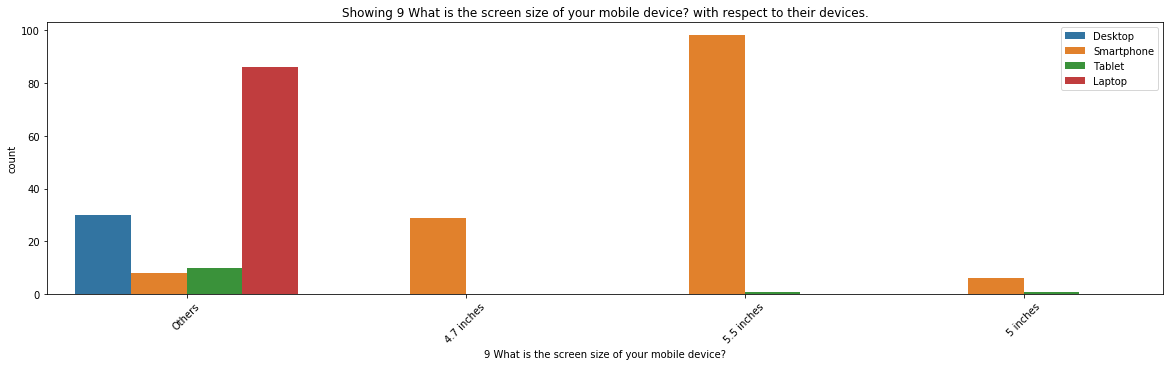

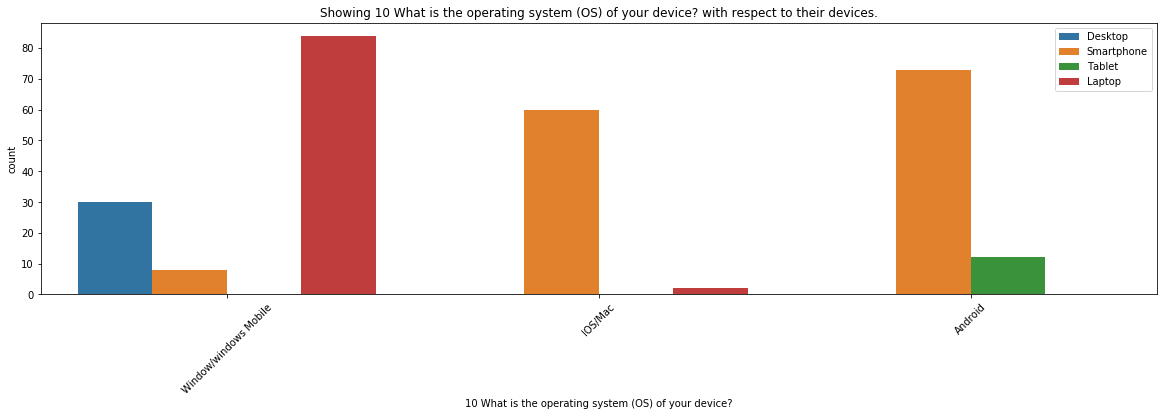

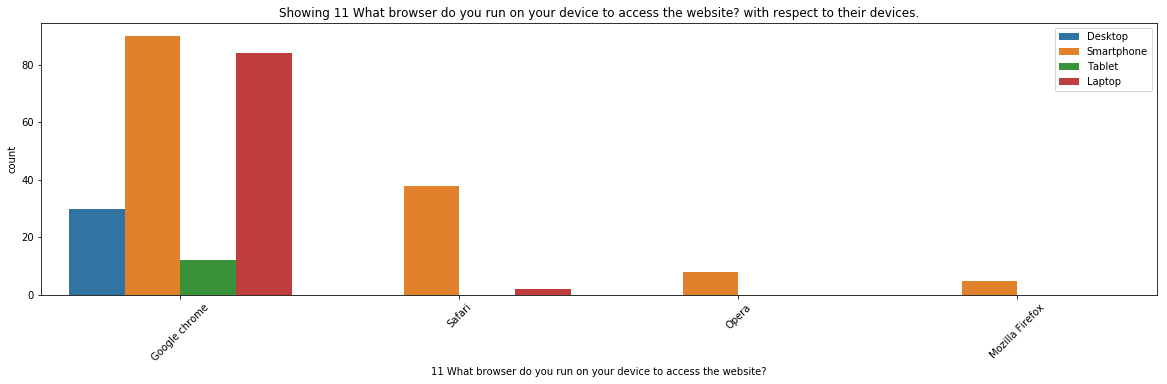

In [31]:
for col in deviceDeatils.iloc[:,1:]:
    fig=plt.figure(figsize=(20,5))
    sns.countplot(data[col],hue=data["8 Which device do you use to access the online shopping?"])
    plt.xticks(rotation=45)
    plt.title("Showing "+col+" with respect to their devices.")
    plt.legend(loc=1)
    plt.show()

Customer widely used Laptop with OS Windows,Smartphones having IOS/Mac and android type of OS to purchase.

GoogleChrome is used in Smartphones and Laptop types of devices.

Laptops and Smartphones with Channel Search-Engine to arrive at their favourite Online Store.

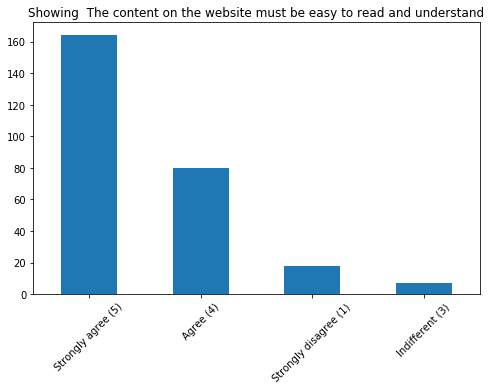

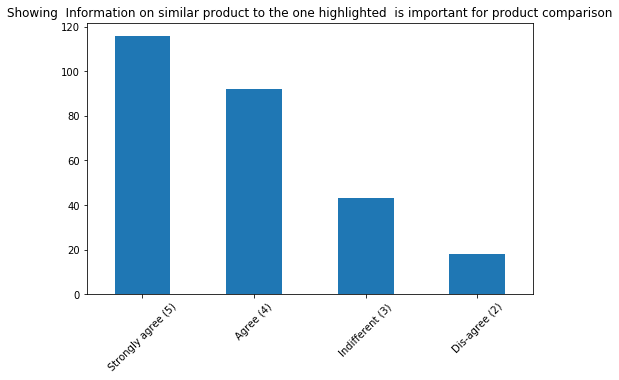

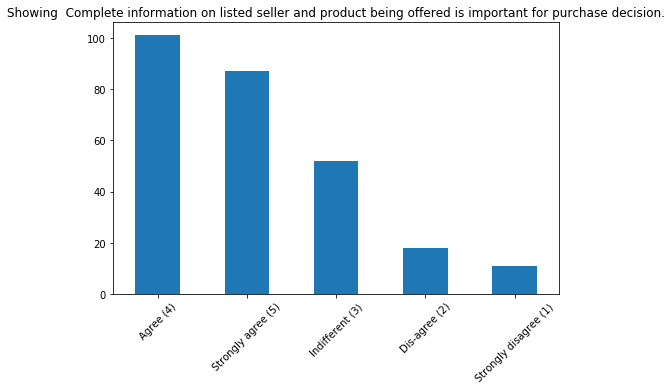

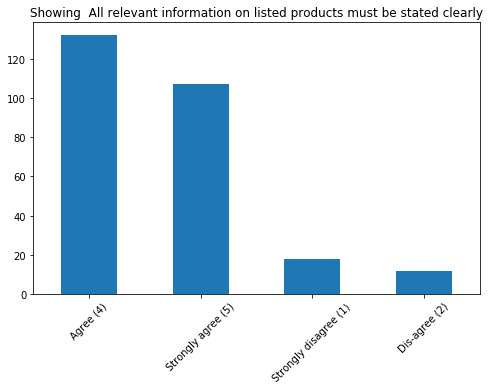

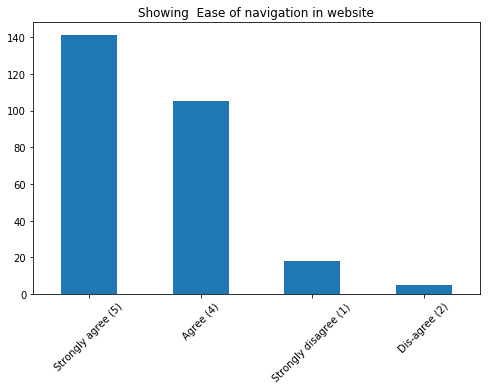

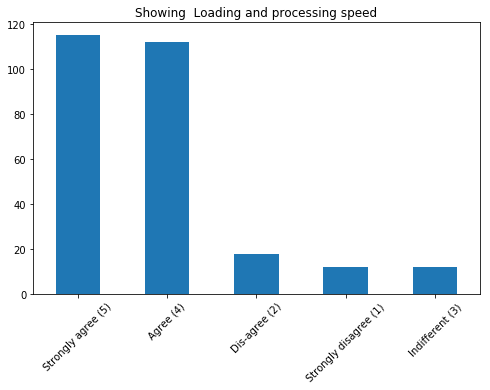

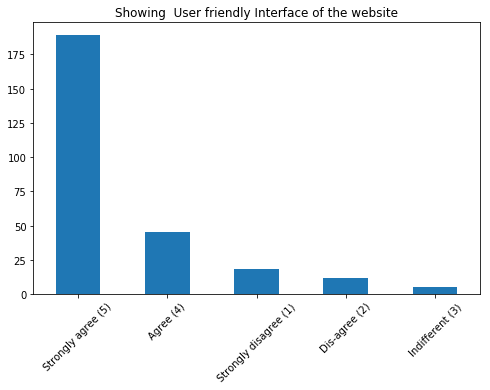

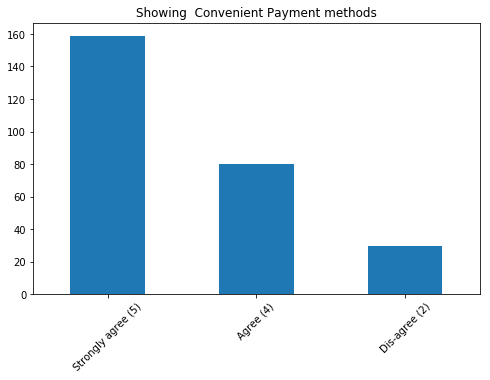

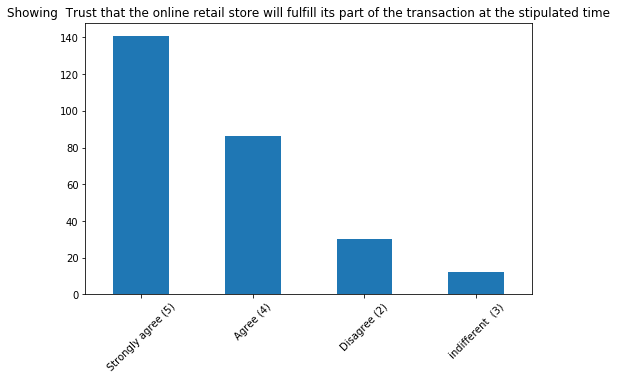

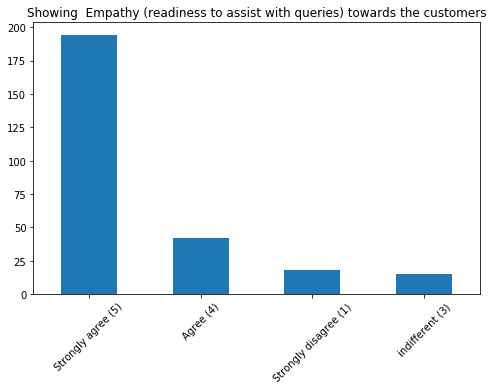

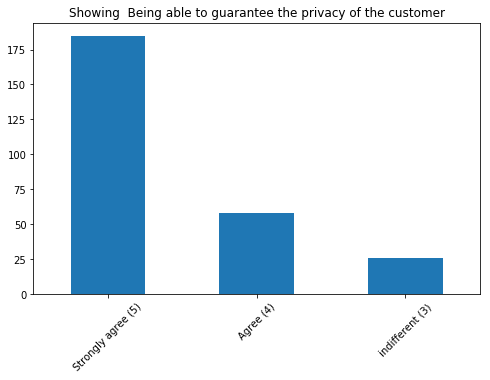

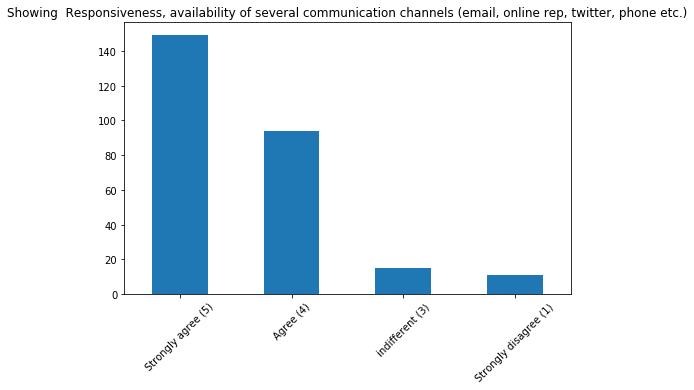

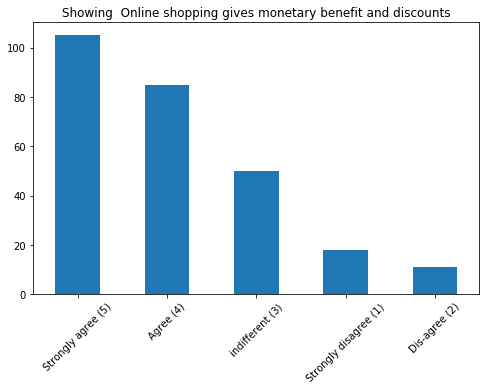

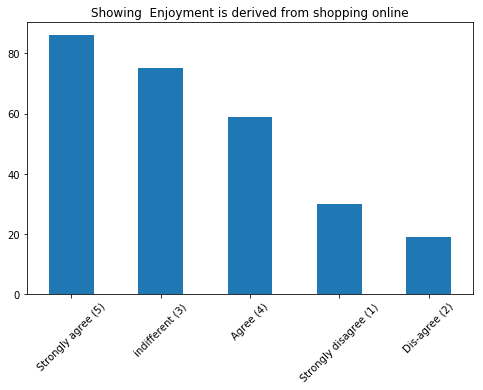

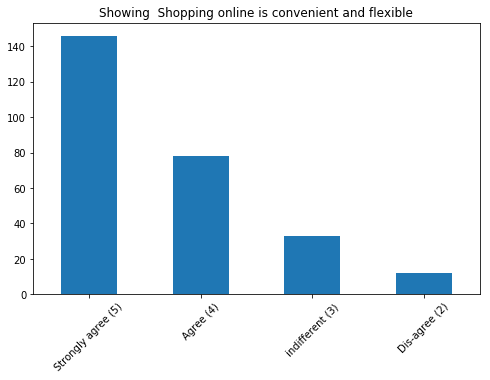

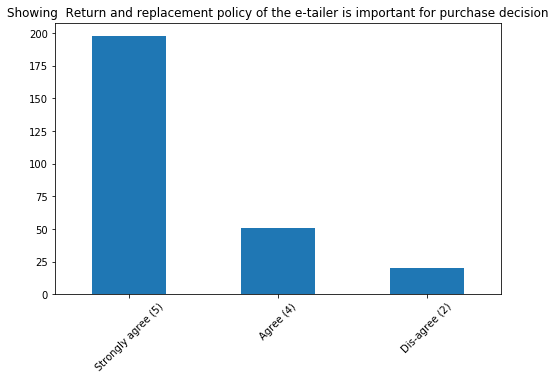

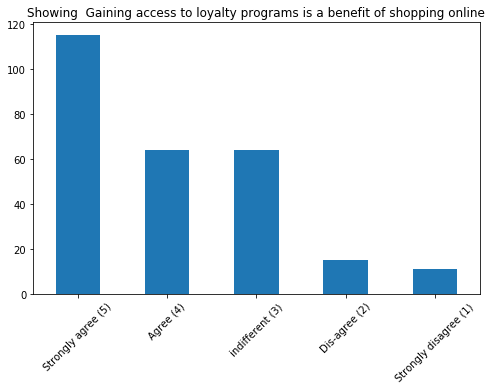

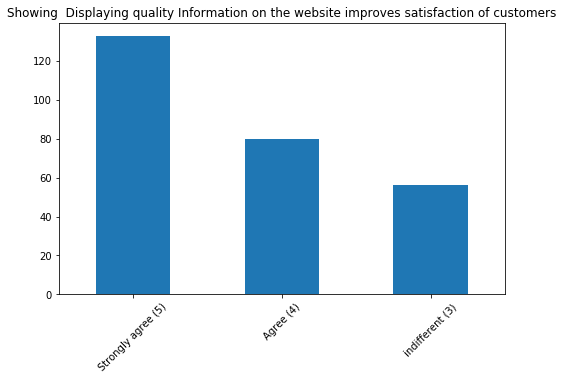

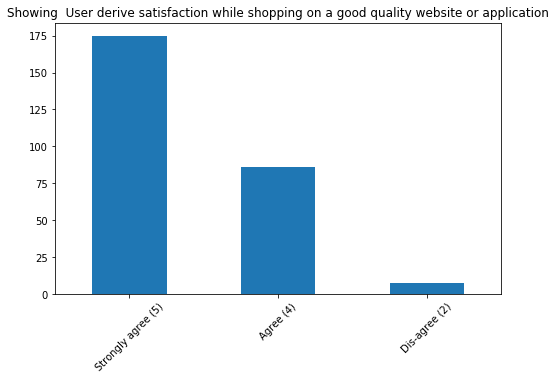

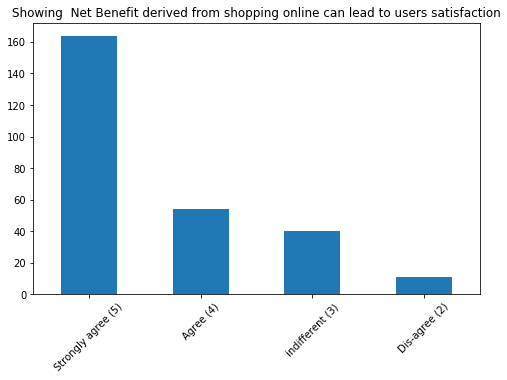

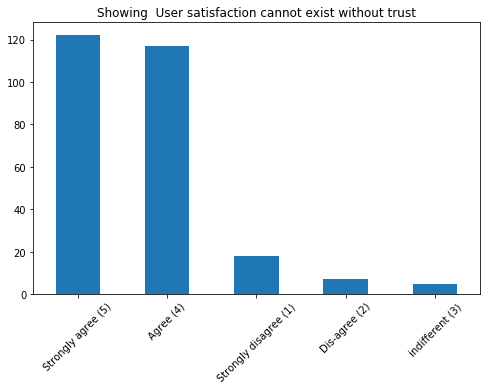

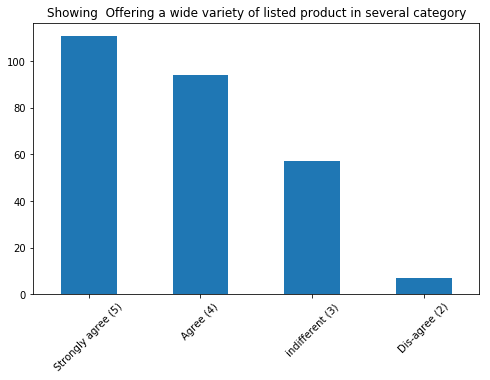

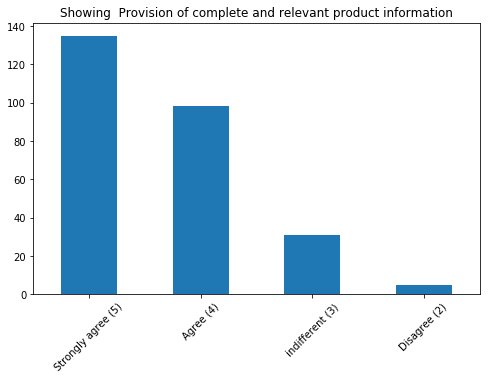

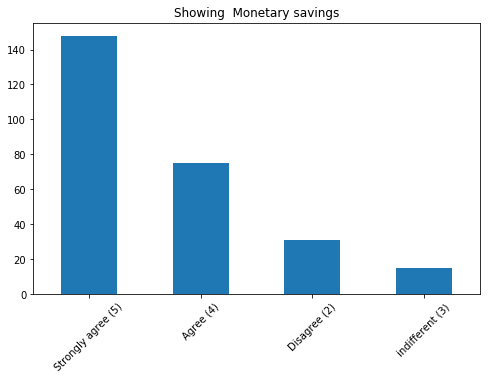

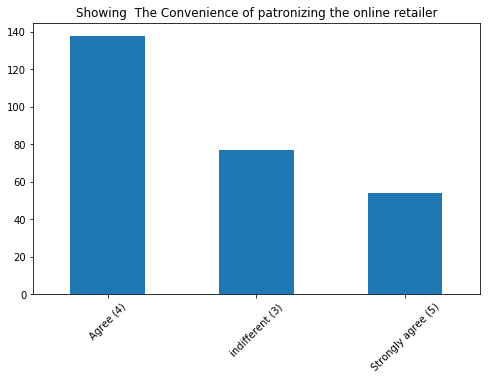

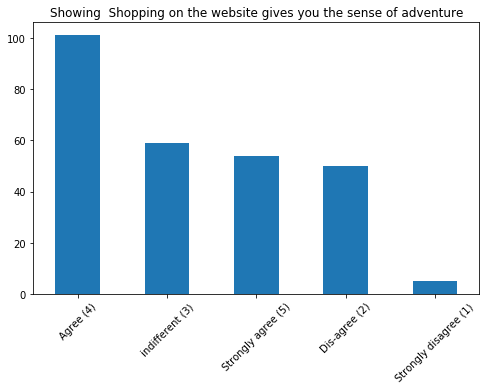

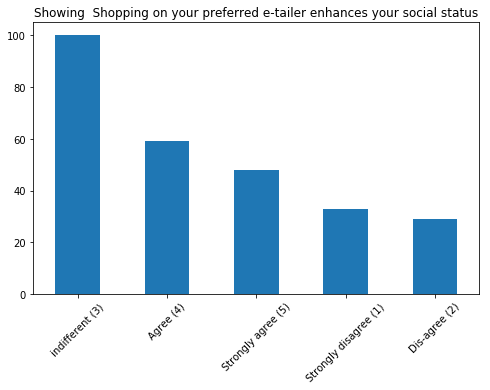

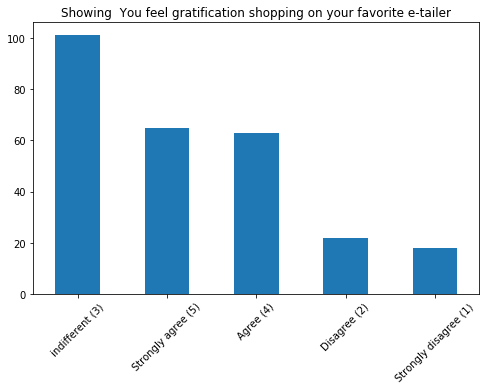

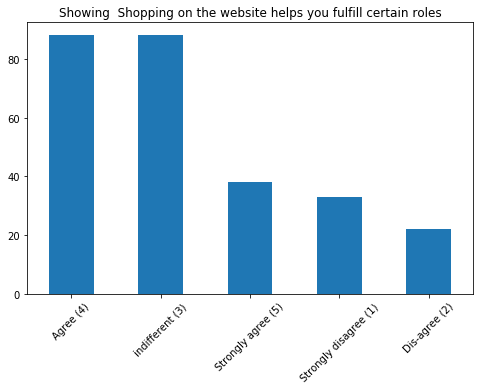

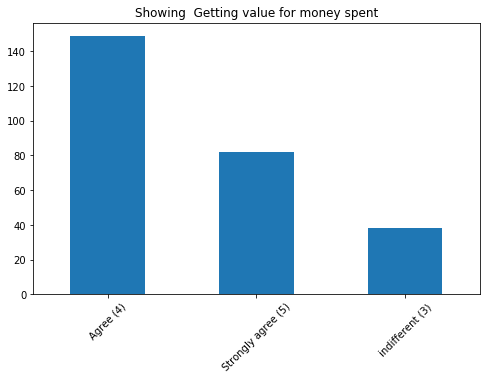

In [29]:
for col in services:
    fig=plt.figure(figsize=(8,5))
    data[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title("Showing "+col[2:])
    plt.show()

Mostly customer are satisfied with info on similiar product to the one highlighted is important for product comparision. No matter what are their ages.

Half of customer are satisfied  while other half customer are feeling dis-satisfied with product being offered to customer for purchase decision.                                  #

Mostly Customer are satisfied with the relevant information of products must be stated clearly.

Navigation on websites is good as Customer are mostly satisfied with this Service.

Loading and processing Speed services of the products for the customer are mostly satisfied.

Most of Customer are strongly satisfied with User friendly Interface of the website that the ease of website to use.

Mostly customers are satiesfied with the payments Services.

Mostly Customers are satisfied with the trust built between the customers and the onlineRetailers stores that they fulfill its part of transaction at the stipulated time.

Mostly Customers are satisfied by the empathy from online stores towards the customer.

Websites are fulfilling the privacy of Customer and most of the customers are satisfied with this.

Most of Customer are satisfied with responsiveness, availibility of of several communication channels.

Most of customers are satisfied with monetary benfits and discounts by online Shopping.

nearly half of customer are not satisfied by the enjoyment service from online shopping. while others are happy/satisfied with that.          #

Mostly customer are stongly satisfied that to shop online is convenient and flexible.

Return & replacement policy services for customers are strongly satisfied with this service.

Most customer are gaining access to loyalty programs is a benefit of shopping online.

Customers are highly satisfied with quality information on websites.

Customer are highly satisfied with the good quality of websites or application.

Mostly customers getting Net Benefit derived from shopping online.

MOstly customers are trusting with the websites services to shop online.

Most customer are satisfied with the service offering wide variety to customers.

Most customer are satisfied with provision of complete and relevant product information.

Most customer has monetary saving while using online shooping.

Mostly customer are not satisfied with the convinience of patronizing the online reatiler.  #

Mostly customer doesn't feels adventure while using websites.      #

Customer feels indiiferent while shopping online there is not such enhancement on their social status.

Customer doesn't feels gratification shopping on their favourite e-tailer.      #

Mostly customer doesn't feels helpful that shopping fulfil their certain roles.    #

Mostly cusomer getting the product variety for which they spent their money.

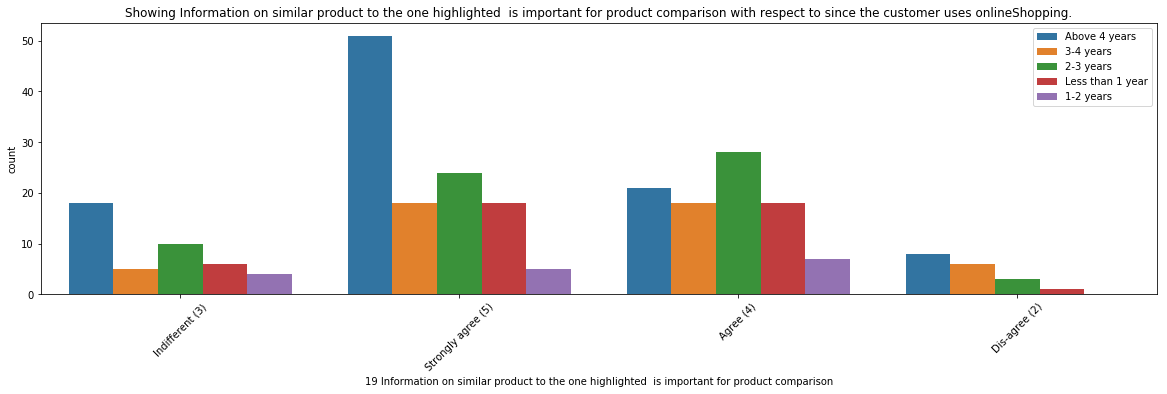

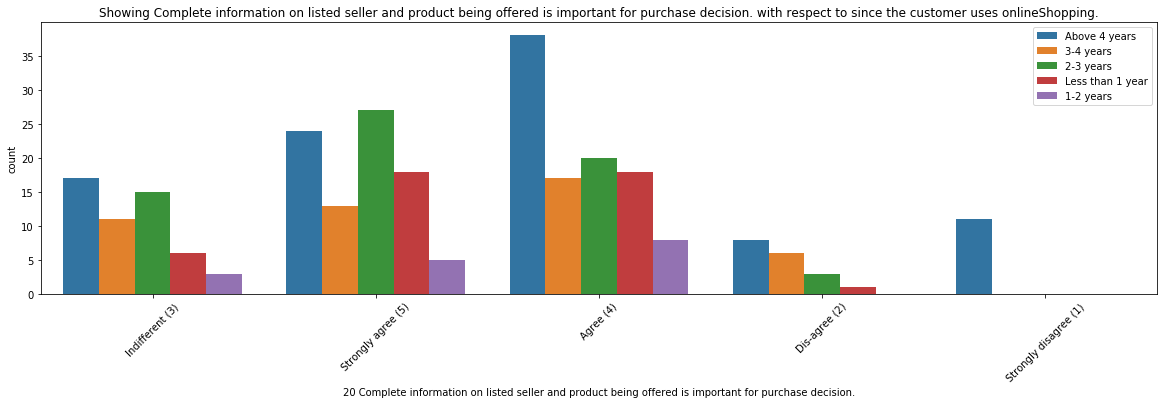

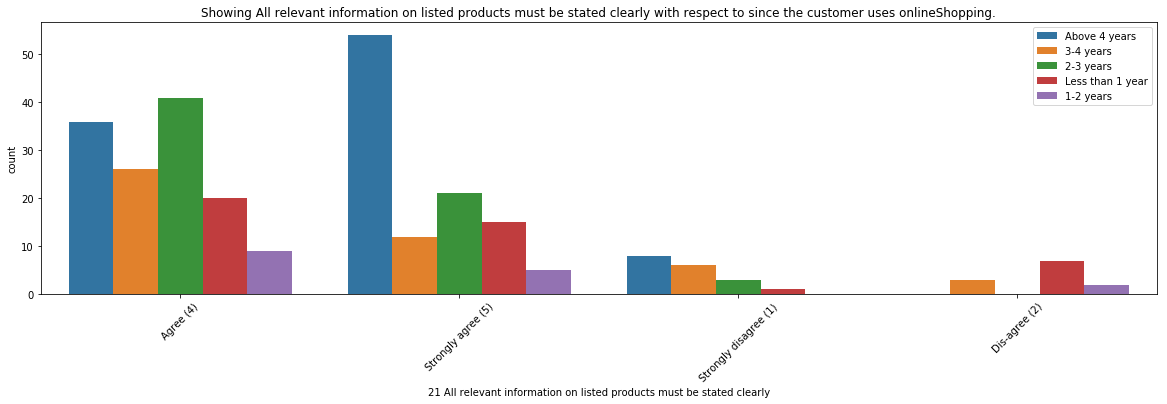

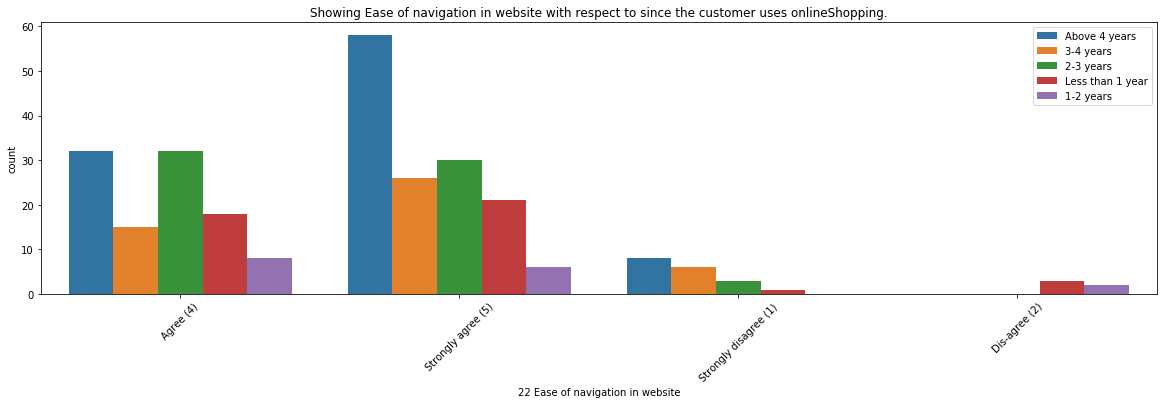

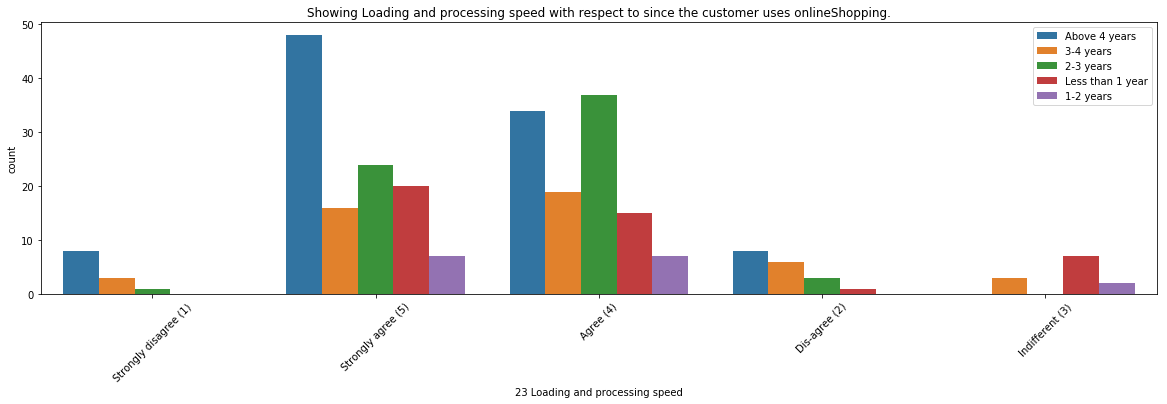

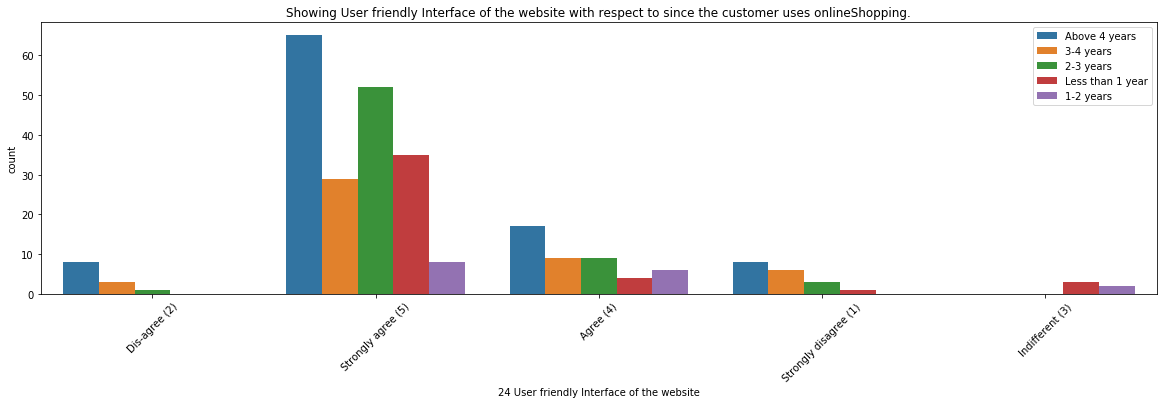

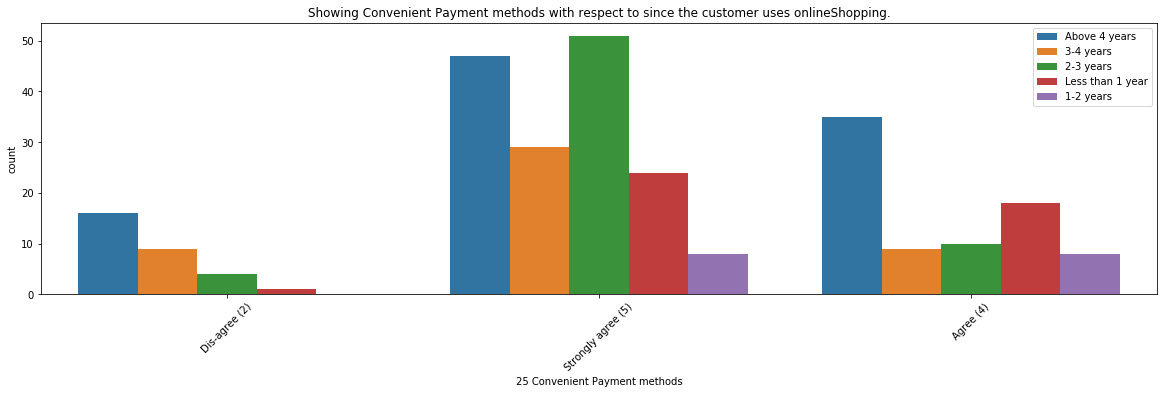

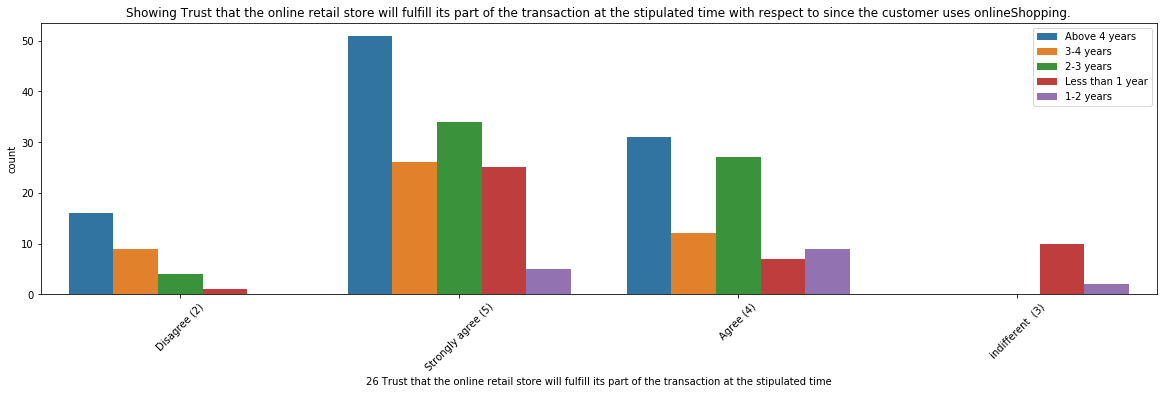

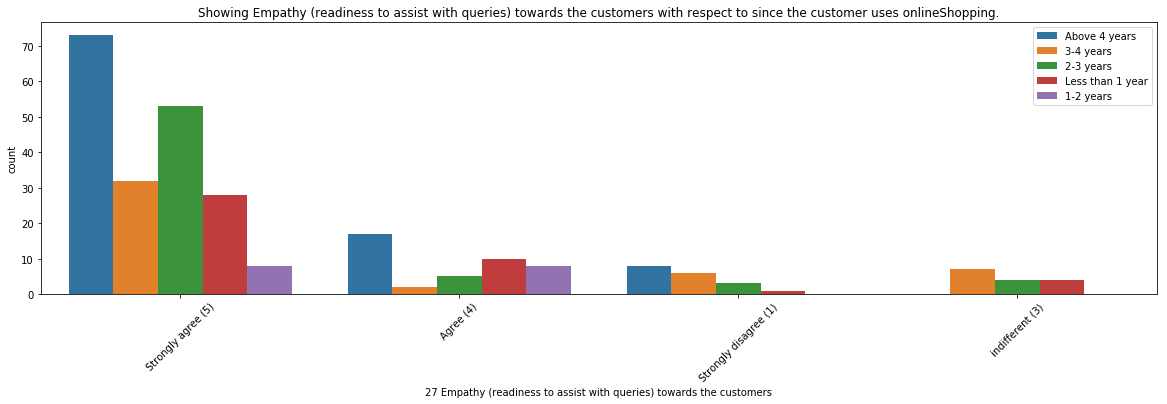

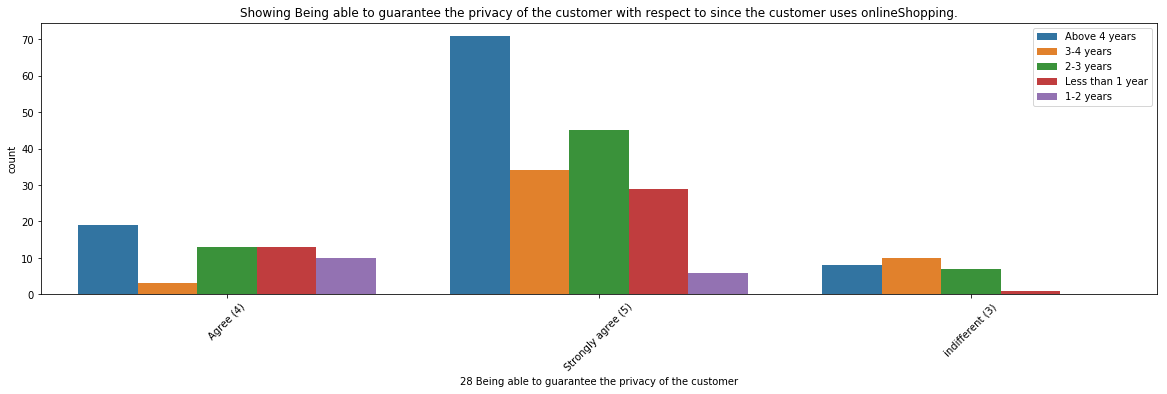

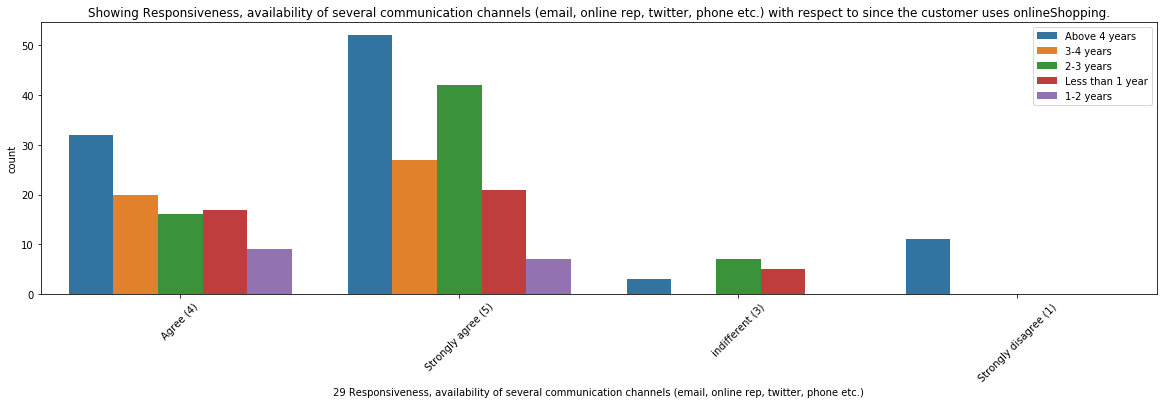

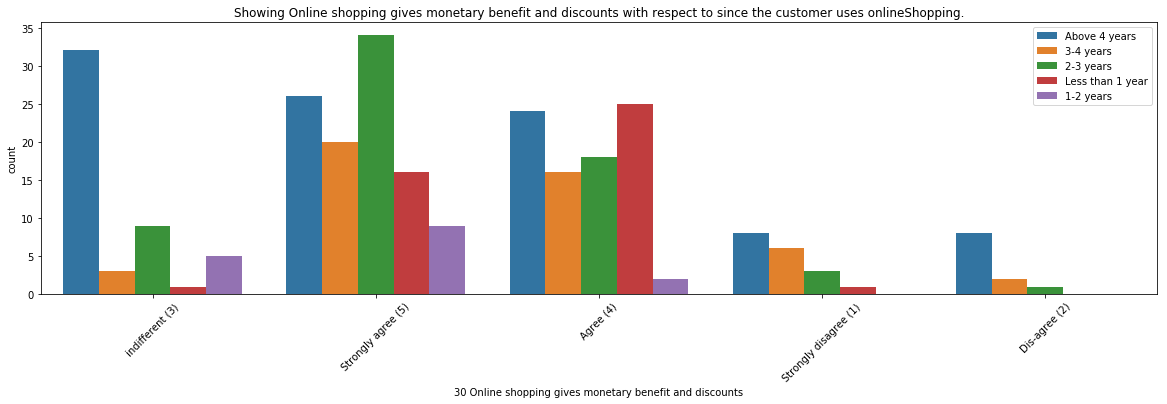

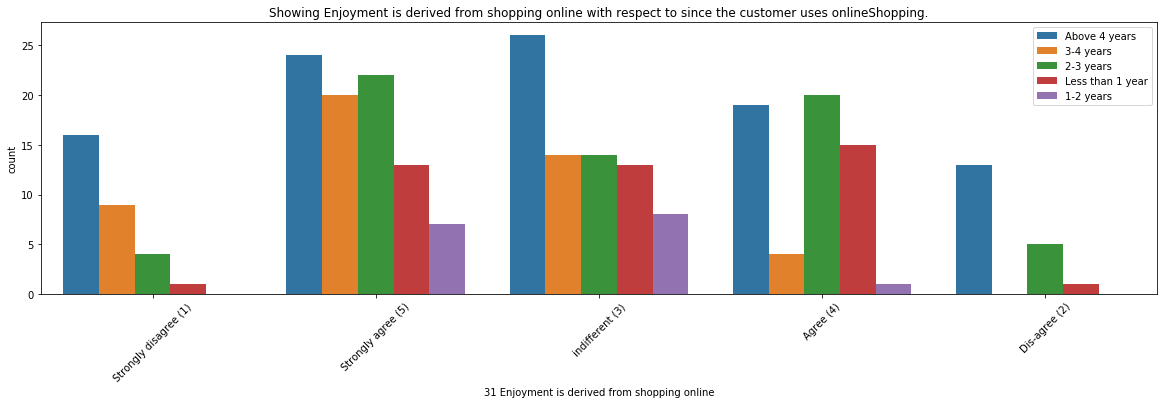

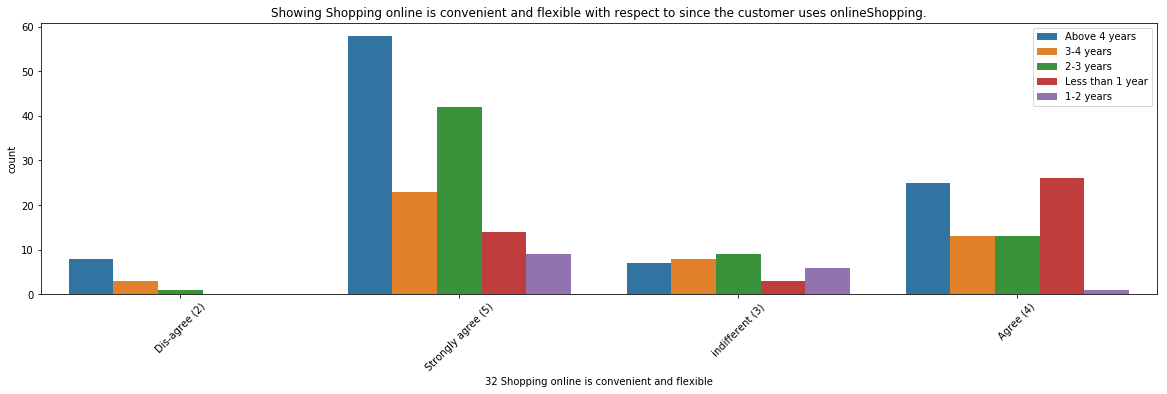

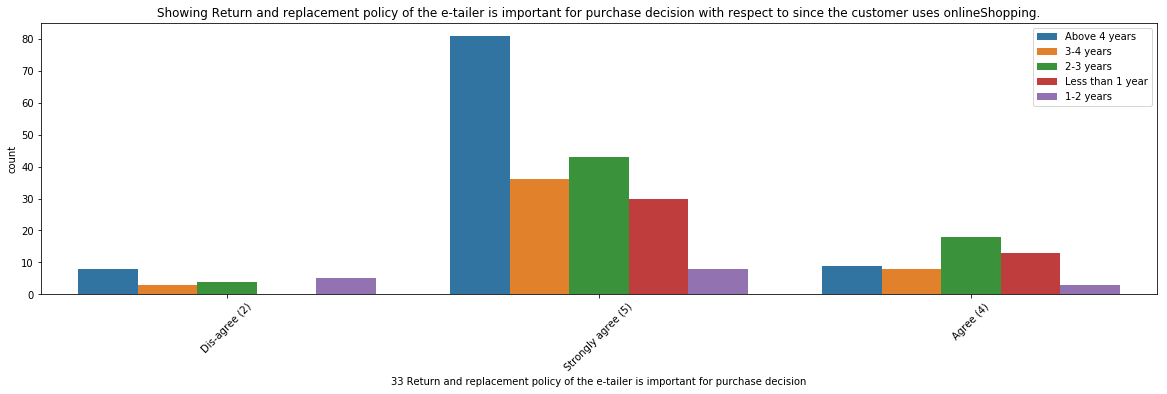

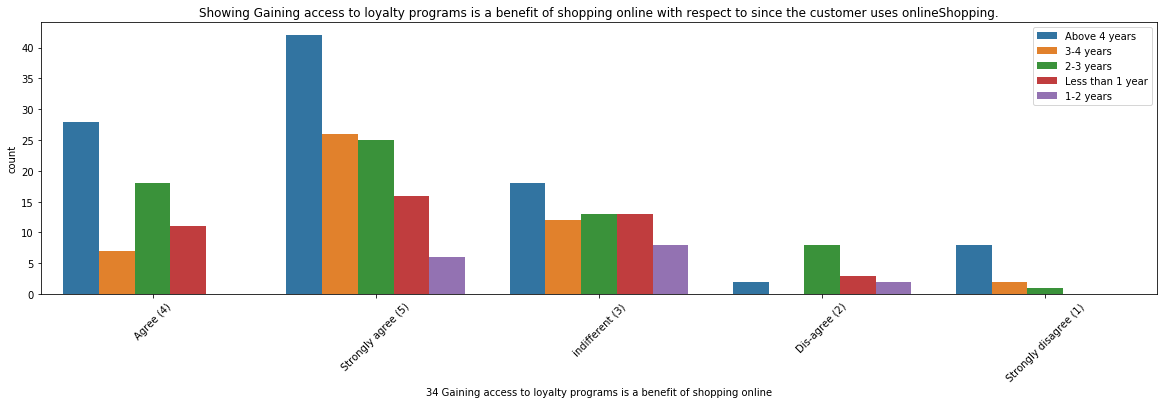

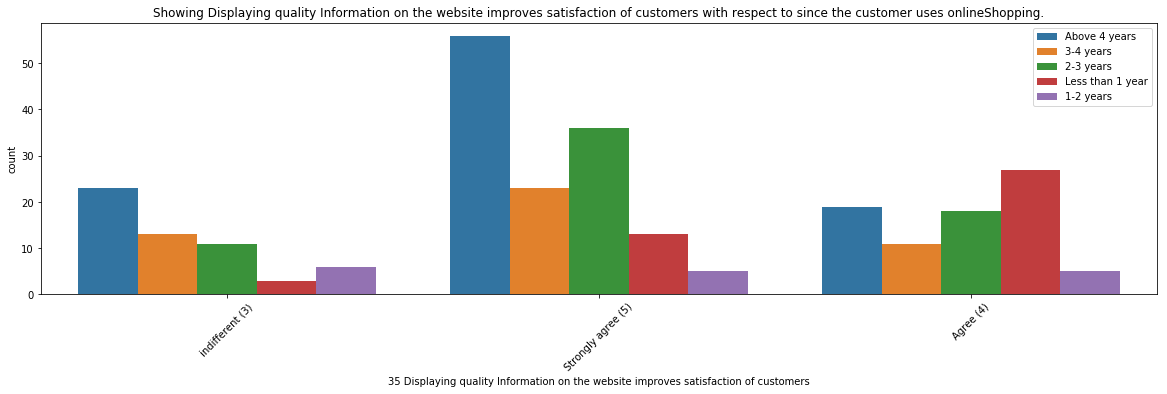

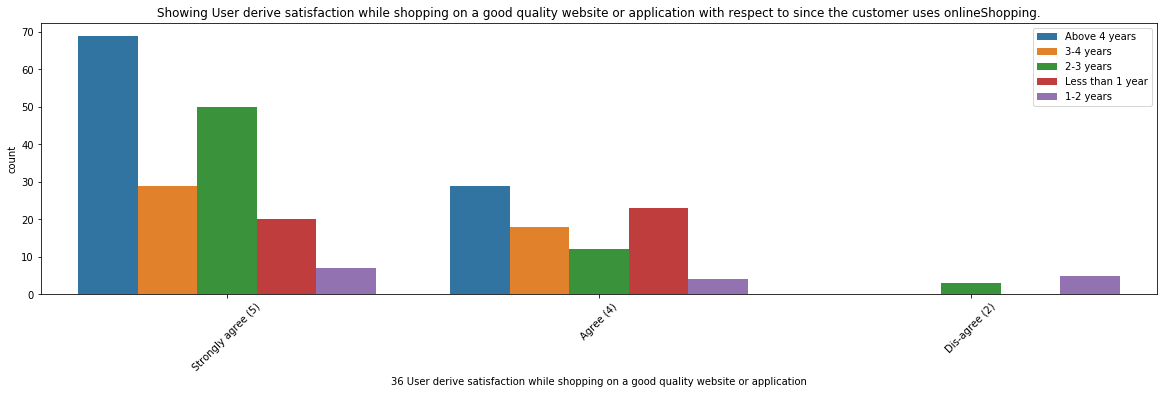

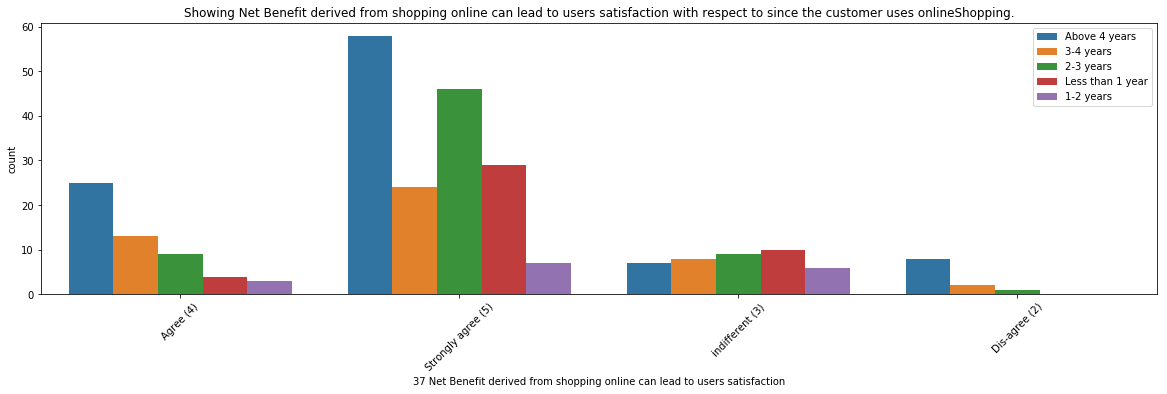

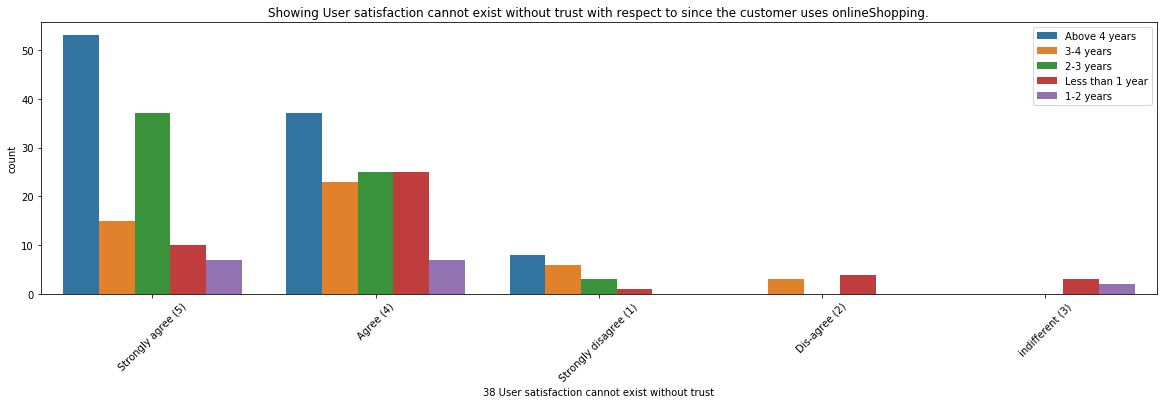

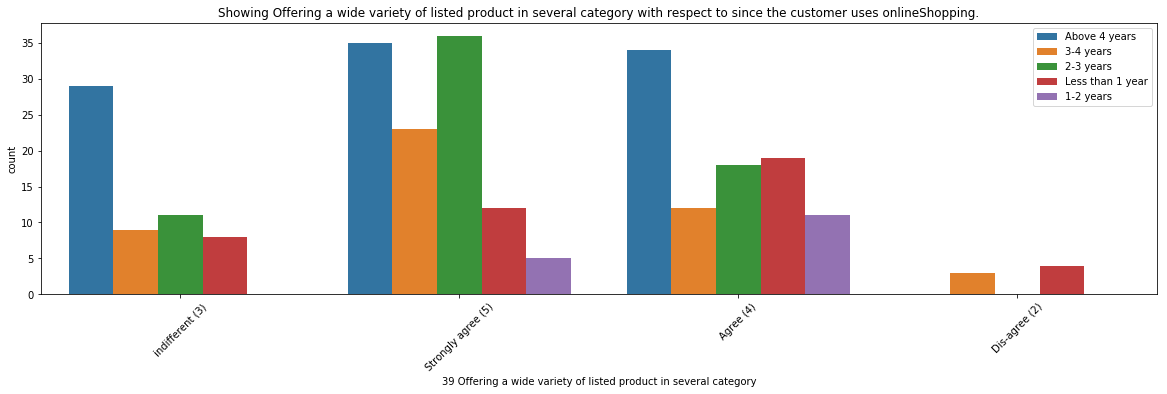

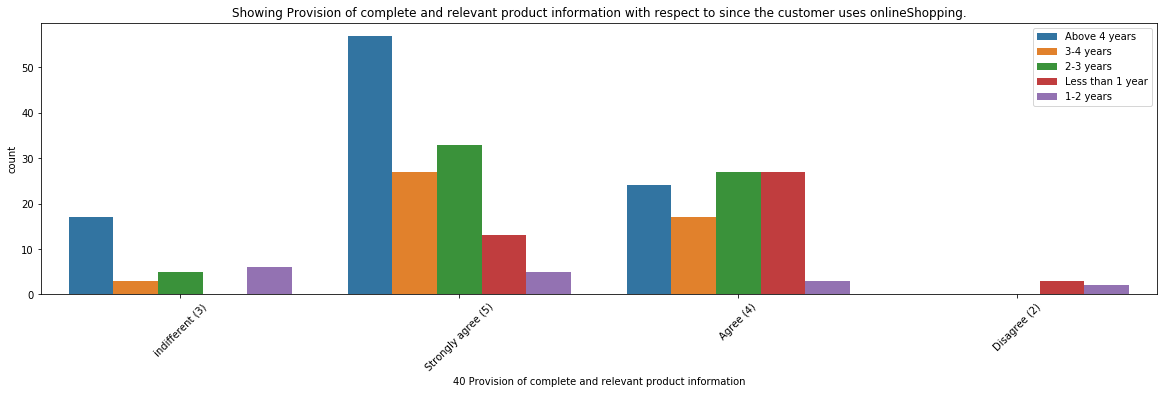

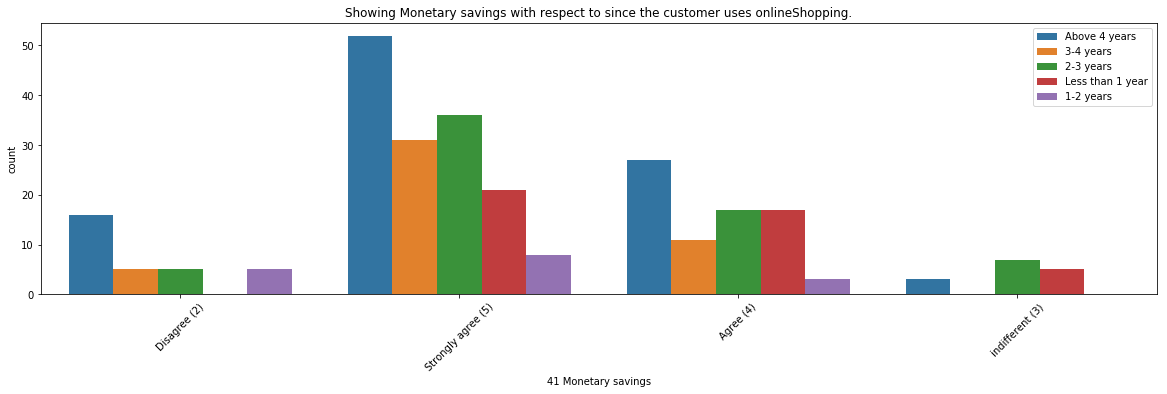

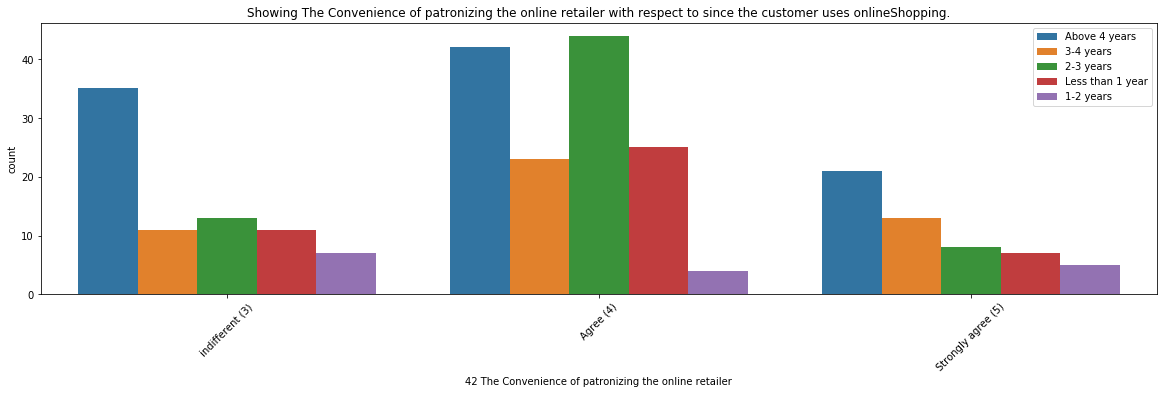

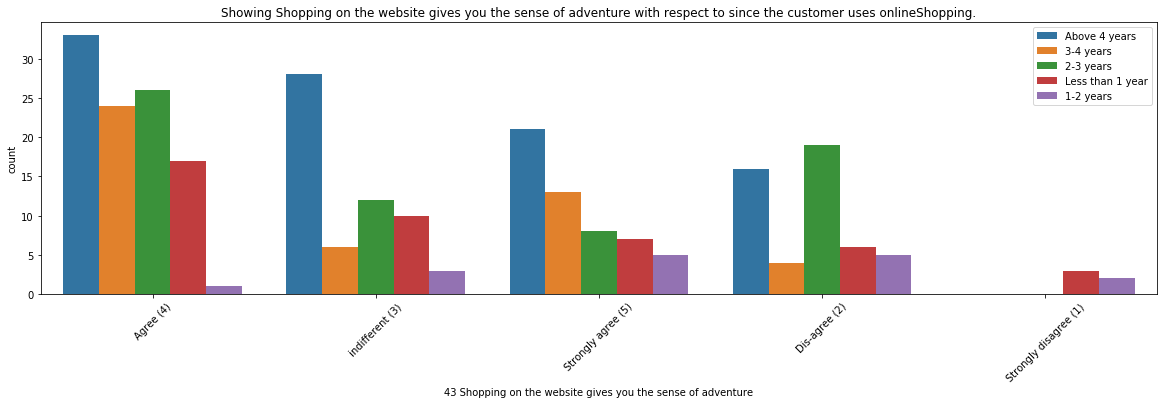

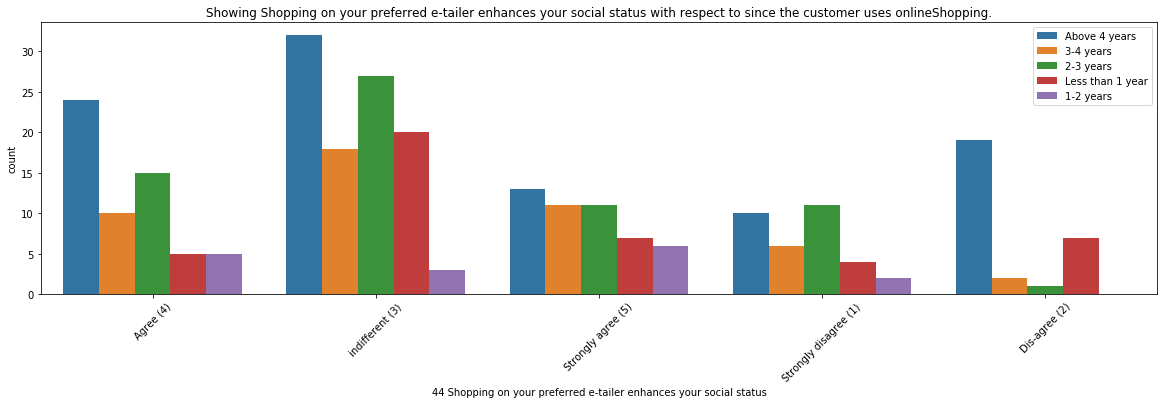

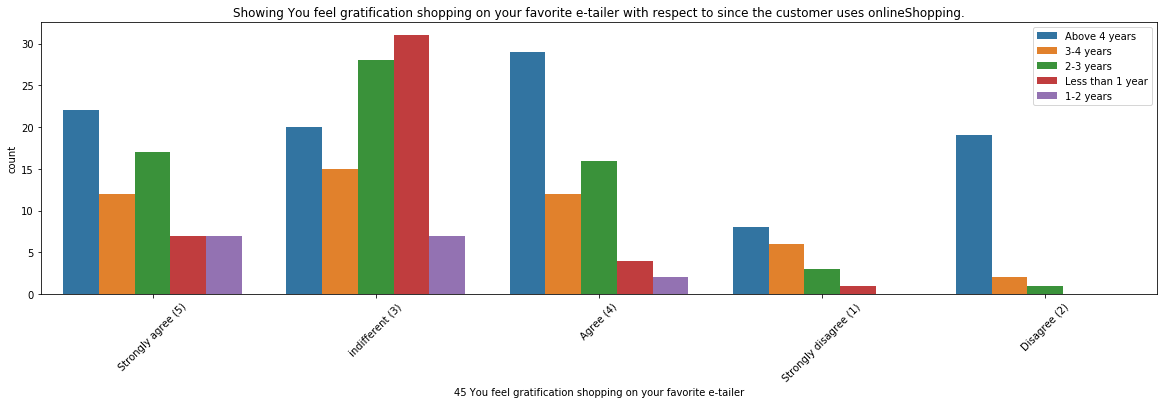

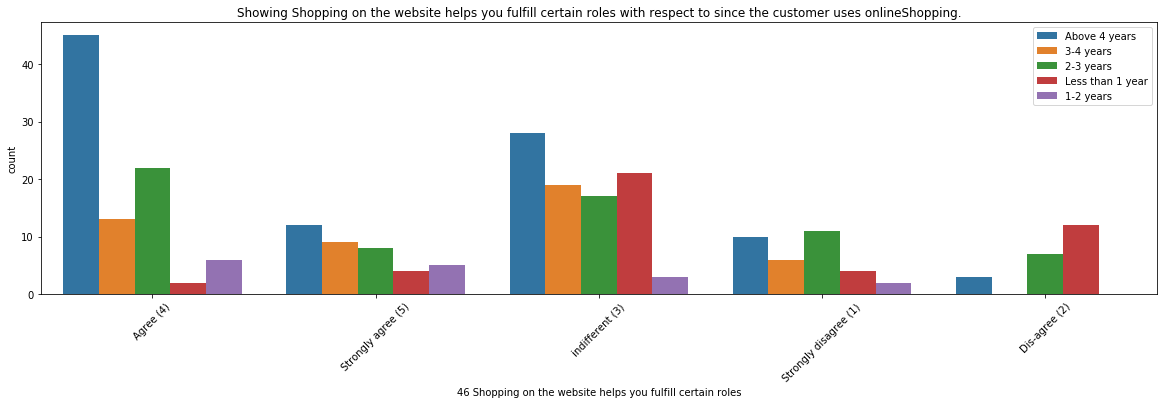

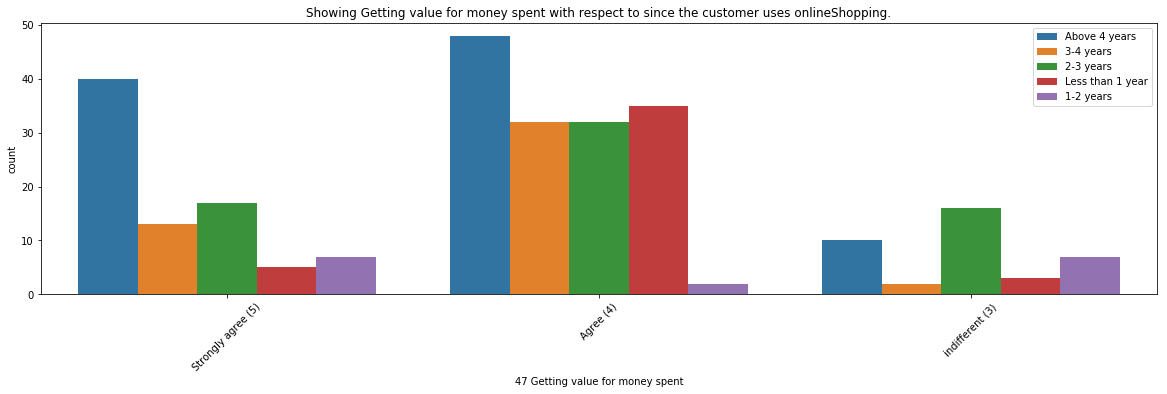

In [297]:
for col in services.iloc[:,:-1]:
    fig=plt.figure(figsize=(20,5))
    sns.countplot(data[col],hue=data["5 Since How Long You are Shopping Online ?"])
    plt.xticks(rotation=45)
    plt.title("Showing "+col[3:]+" with respect to since the customer uses onlineShopping.")
    plt.legend(loc=1)
    plt.show()

mostly customers who are using websites more than  4 years are not satisfied with information listed seller and product being offered to customer from websites.

Mostly customer who are using websites more than 3 years are not satisfied by the enjoyment service from online shopping. while others are happy/satisfied with that.

only new customer who are customers for less than 1 year are convenient of patronizing the online retailer.

Mostly Customers who are using less than 2 years doesn't feels adventure while using websites.

Mostly customer who are using websites less than 1 year or 2-3 years of using doesn,t feels gratification while shopping.

Mostly customer who are using websites less than 1 year doesn't helps to fulfill their certain roles.

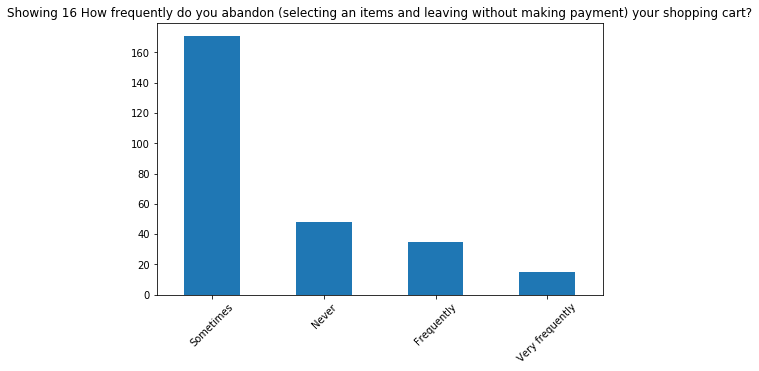

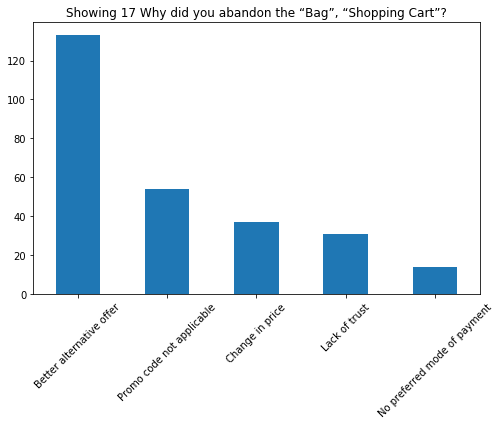

In [301]:
for col in abondon:
    fig=plt.figure(figsize=(8,5))
    data[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title("Showing "+col)
    plt.show()

Mostly customer sometimes keeps their items in cart without making payment.

Mostly customer got better alternatives offers thats why they abandon vag from shopping Cart. 

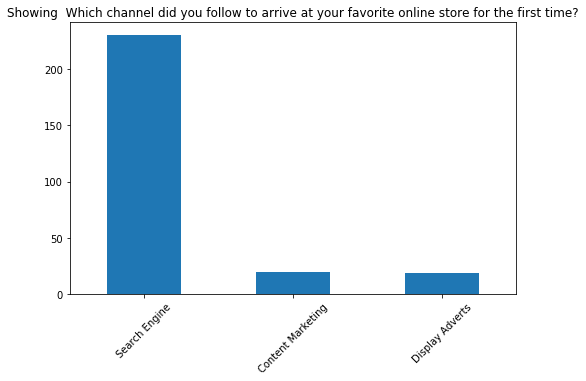

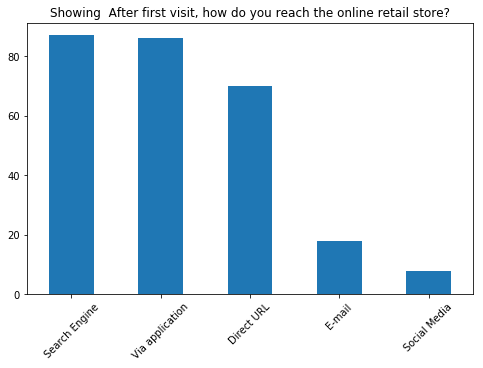

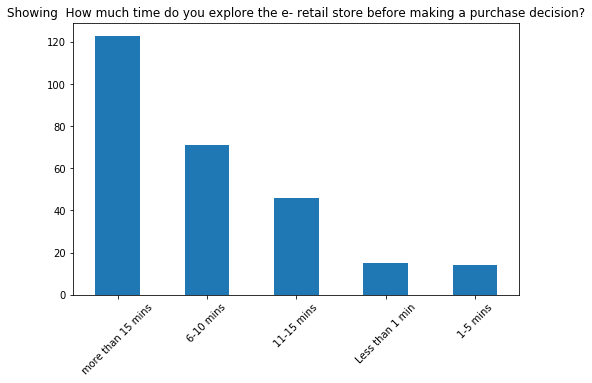

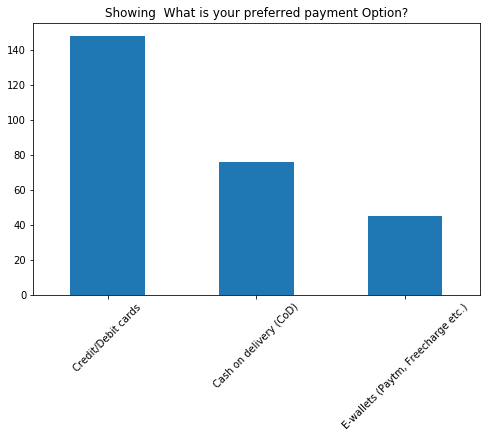

In [305]:
for col in firstVisit:
    fig=plt.figure(figsize=(8,5))
    data[col].value_counts().plot(kind='bar')
    plt.xticks(rotation=45)
    plt.title("Showing "+col[2:])
    plt.show()

SearchEngine channel are mostly followed by customer to aarived to their favourite online store.

Customer are less rech to online retail store through Email or social media.

Mostly customer tooks more than 15 mins for exploring the e-retail store before making purchse decision.

mostly customers used their cards for payment.



In [33]:
#A separate dataframe for displaying the positive feedback
posFeed=onlineReatilers.drop(["Longer time to get logged in (promotion, sales period)",
                   "Longer time in displaying graphics and photos (promotion, sales period)",
                   "Late declaration of price (promotion, sales period)",
                   "Longer page loading time (promotion, sales period)",
                   "Limited mode of payment on most products (promotion, sales period)",
                   "Longer delivery period", "Frequent disruption when moving from one page to another"], axis=1)
posFeed.head(2).T

,0,1
"From the following, tick any (or all) of the online retailers you have shopped from;","Amazon.in, Paytm.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"
Easy to use website or application,Paytm.com,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"
Visual appealing web-page layout,Flipkart.com,"Amazon.in, Myntra.com"
Wild variety of product on offer,Flipkart.com,"Flipkart.com, Myntra.com"
"Complete, relevant description information of products",Snapdeal.com,"Amazon.in, Flipkart.com, Myntra.com"
Fast loading website speed of website and application,Snapdeal.com,"Amazon.in, Flipkart.com, Myntra.com"
Reliability of the website or application,Paytm.com,Myntra.com
Quickness to complete purchase,Paytm.com,"Amazon.com, Flipkart.com, Myntra.com"
Availability of several payment options,Patym.com,"Amazon.in, Flipkart.com, Myntra.com"
Speedy order delivery,Amazon.in,"Amazon.in, Flipkart.com"


In [44]:
negFeed=onlineReatilers[["Longer time to get logged in (promotion, sales period)",
                   "Longer time in displaying graphics and photos (promotion, sales period)",
                   "Late declaration of price (promotion, sales period)",
                   "Longer page loading time (promotion, sales period)",
                   "Limited mode of payment on most products (promotion, sales period)",
                   "Longer delivery period", "Frequent disruption when moving from one page to another"]]
negFeed.head(2).T

,0,1
"Longer time to get logged in (promotion, sales period)",Amazon.in,"Amazon.in, Flipkart.com"
"Longer time in displaying graphics and photos (promotion, sales period)",Amazon.in,Myntra.com
"Late declaration of price (promotion, sales period)",Flipkart.com,snapdeal.com
"Longer page loading time (promotion, sales period)",Flipkart.com,Snapdeal.com
"Limited mode of payment on most products (promotion, sales period)",Amazon.in,Snapdeal.com
Longer delivery period,Paytm.com,Snapdeal.com
Frequent disruption when moving from one page to another,Amazon.in,Myntra.com


In [35]:
#Analysing the negative feedbacks separately
website_list=['Amazon.in','Flipkart.com','Paytm.com','Myntra.com','Snapdeal.com']  #Website list
col_names=[]   #Empty list for column names
websites=[]    #Empty list for websites
count=[]       #Empty list for checking the count of no of times the websites are mentioned

for col in negFeed.columns:
    for i in website_list:
        present=len(negFeed[negFeed[col].str.contains(i)])  #Checking if websites in dataframe are available in the website list 
        col_names.append(col)   #Appending the column names
        websites.append(i)    #Appending the website names
        count.append(present) #Appending the count ofcustomer at website present in feedback

In [36]:
#Creating negative feedback dataframe
negative_df=pd.DataFrame([col_names,websites,count],index=["columnsName","websites","customerCount"]).T
negative_df

,columnsName,websites,customerCount
0,"Longer time to get logged in (promotion, sales...",Amazon.in,135
1,"Longer time to get logged in (promotion, sales...",Flipkart.com,103
2,"Longer time to get logged in (promotion, sales...",Paytm.com,77
3,"Longer time to get logged in (promotion, sales...",Myntra.com,35
4,"Longer time to get logged in (promotion, sales...",Snapdeal.com,67
5,Longer time in displaying graphics and photos ...,Amazon.in,126
6,Longer time in displaying graphics and photos ...,Flipkart.com,94
7,Longer time in displaying graphics and photos ...,Paytm.com,28
8,Longer time in displaying graphics and photos ...,Myntra.com,74
9,Longer time in displaying graphics and photos ...,Snapdeal.com,92


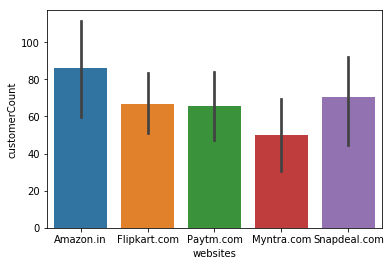

In [37]:
#Plotting barplot for people_count vs website relationship
sns.barplot(x='websites',y='customerCount',data=negative_df)
plt.show()

During the promotion time, Amazon has received more negative feedback from customers followed by Snapdeal, Flipkart and Paytm.

We can note that difference between negative feedbacks of the websites is not very huge and it needs to be improved in order to handle such situations.

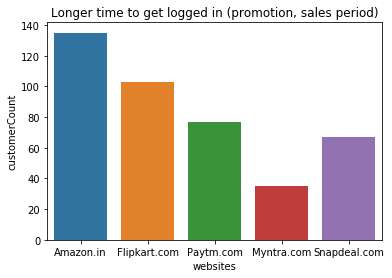

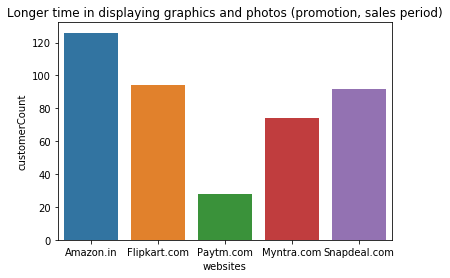

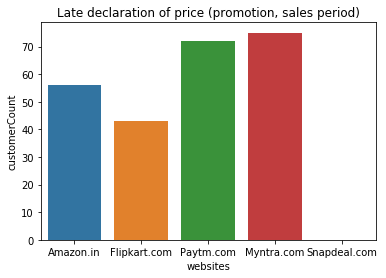

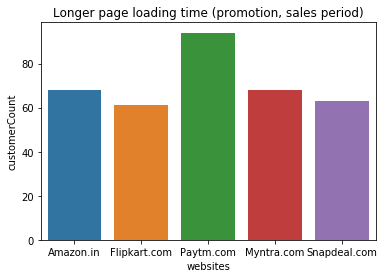

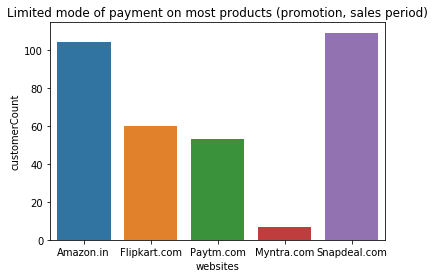

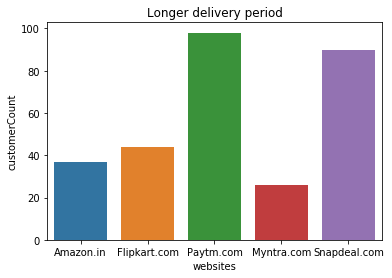

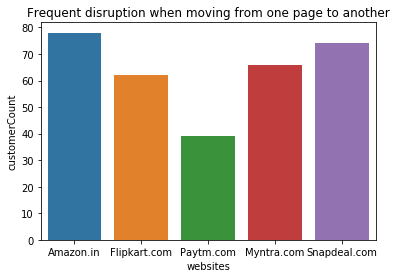

In [38]:
#Extracting feature wise comparison from negative feedback dataframe
b=range(0,81,5)
try:
    for i in b:
        features=negative_df.iloc[i:i+5:]
        sns.barplot(x='websites',y='customerCount',data=features)
        plt.title(features['columnsName'][i])
        plt.show()
        print("\n")
except ValueError:   #As the value has some error while iterating, we are passing it by using except
    pass

###### Observations

1.Amazon takes longer time to get logged in during promotion, followed by flipkart, paytm and snapdeal.

2.Amazon takes longer time in displaying graphics and photos followed by flipkart and snapdeal.com.

3.Myntra and Paytm makes late declaration of price during promotion.

4.Paytm takes longer time to load the page during promotion.

5.Snapdeal and Amazon have limited mode of payment on most of products during promotion.

6.Paytm and Snapdeal take a longer delivery period, whereas Myntra and Amazon takes lesser delivery period.

7.Amazon, Snapdeal and Myntra have frequent discrepencies, when moving from one page to another.

In [39]:
#Analysing the positive feedbacks separately
website_list=['Amazon.in','Flipkart.com','Paytm.com','Myntra.com','Snapdeal.com']  #Website list
col_names=[]   #Empty list for column names
websites=[]    #Empty list for websites
count=[]       #Empty list for checking the count of customer present to websites are mentioned

for col in posFeed.columns:
    for i in website_list:
        present=len(posFeed[posFeed[col].str.contains(i)])  #Checking if websites in dataframe are available in the website list 
        col_names.append(col)   #Appending the column names
        websites.append(i)    #Appending the website names
        count.append(present) #Appending the count of customer at website present in feedback

#Creating positive feedback dataframe
positive_df=pd.DataFrame([col_names,websites,count],index=["columnsName","websites","customerCount"]).T
positive_df

,columnsName,websites,customerCount
0,"From the following, tick any (or all) of the o...",Amazon.in,269
1,"From the following, tick any (or all) of the o...",Flipkart.com,221
2,"From the following, tick any (or all) of the o...",Paytm.com,150
3,"From the following, tick any (or all) of the o...",Myntra.com,146
4,"From the following, tick any (or all) of the o...",Snapdeal.com,182
...,...,...,...
80,Which of the Indian online retailer would you ...,Amazon.in,219
81,Which of the Indian online retailer would you ...,Flipkart.com,127
82,Which of the Indian online retailer would you ...,Paytm.com,44
83,Which of the Indian online retailer would you ...,Myntra.com,76


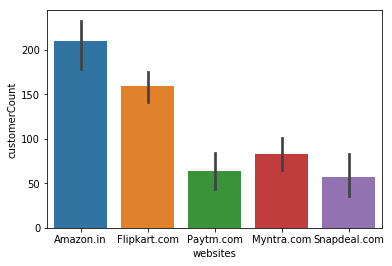

In [40]:
#Plotting barplot for people_count vs website relationship
sns.barplot(x='websites',y='customerCount',data=positive_df)

We can observe that Amazon has received overall good feedback from the customers, followed by Flipkart, and snapdeal has received less number of feedbacks.

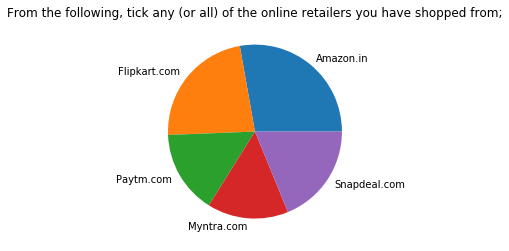

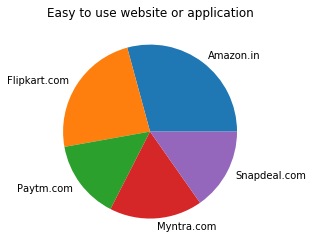

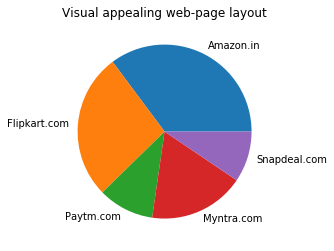

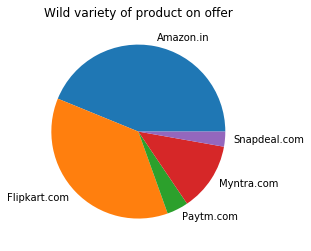

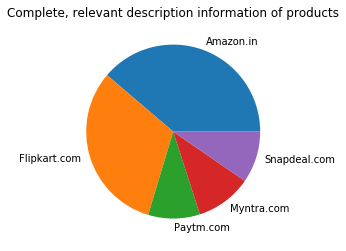

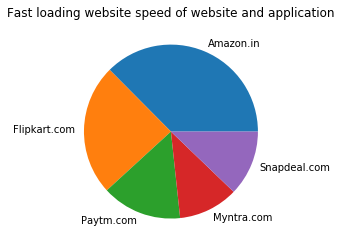

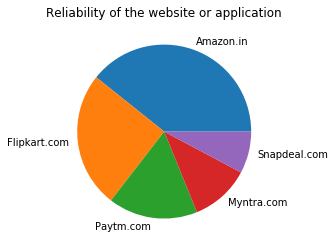

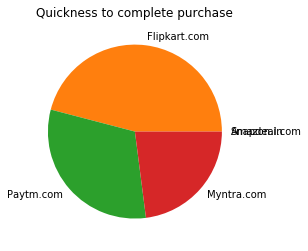

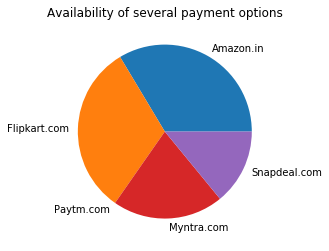

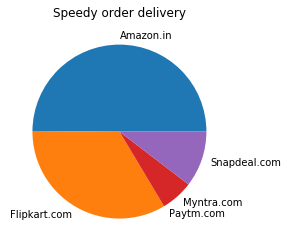

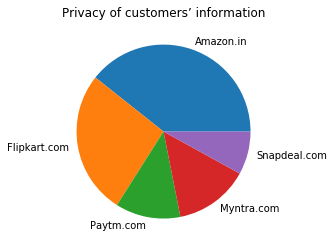

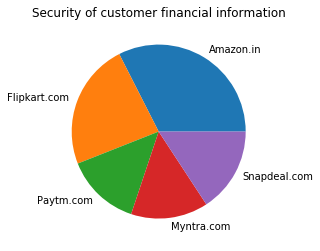

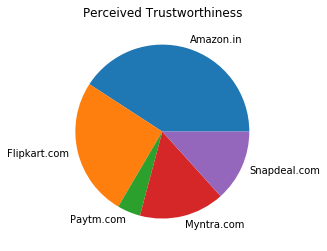

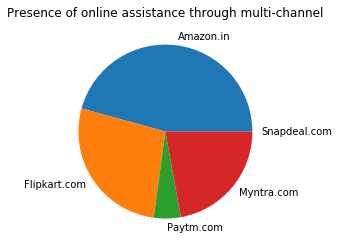

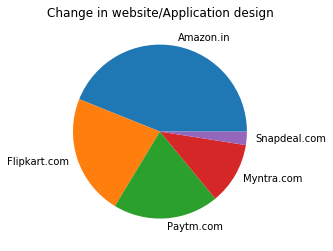

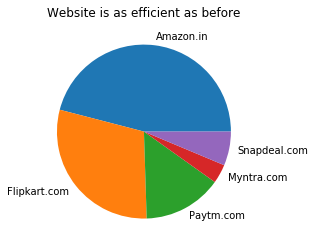

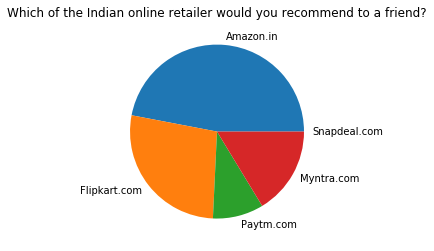

In [43]:
#Extracting feature wise comparison from positive feedback dataframe and plotting the data using pie chart
b=range(0,81,5)
for i in b:
    a=positive_df.iloc[i:i+5,:]
    plt.pie('customerCount', labels='websites',data=a)
    plt.title(a['columnsName'][i])
    plt.show()
    print("\n")

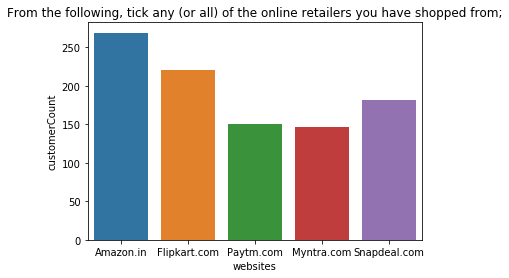

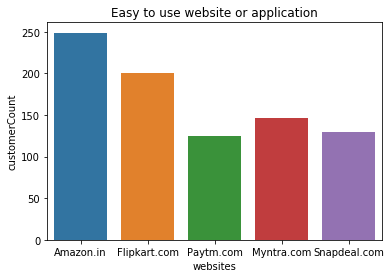

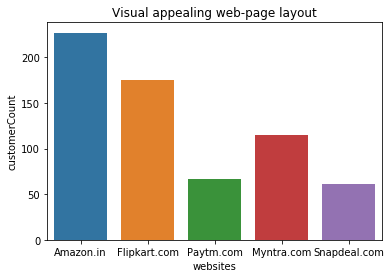

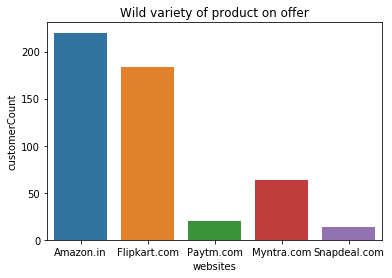

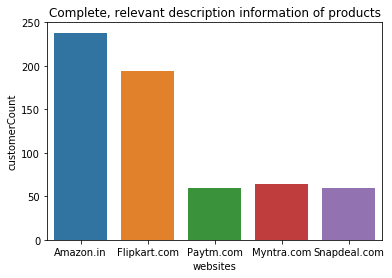

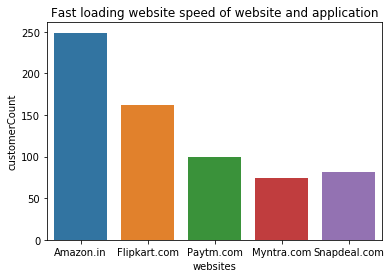

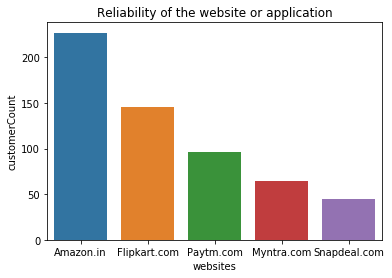

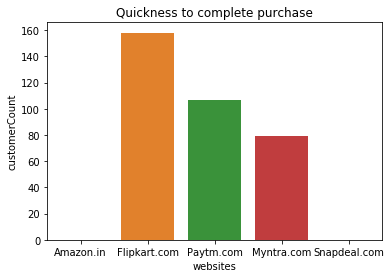

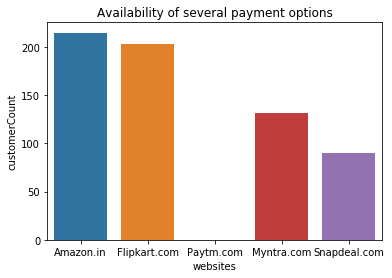

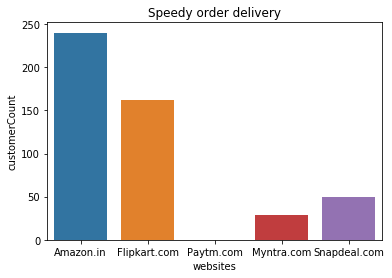

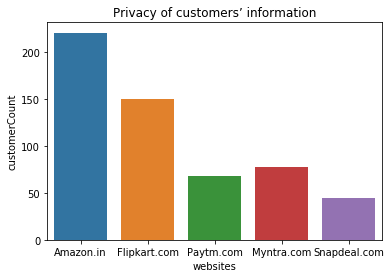

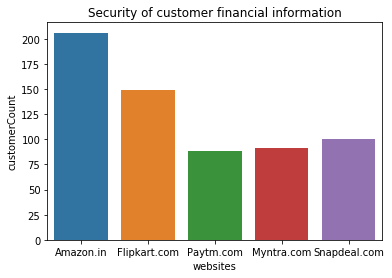

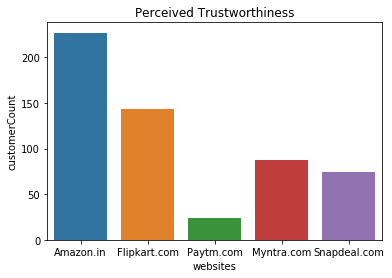

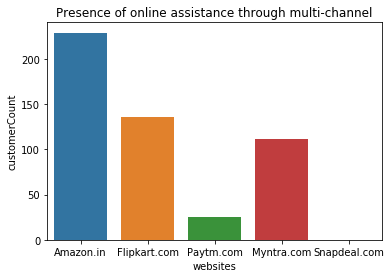

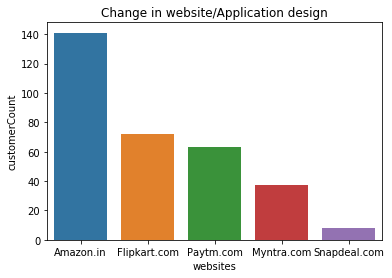

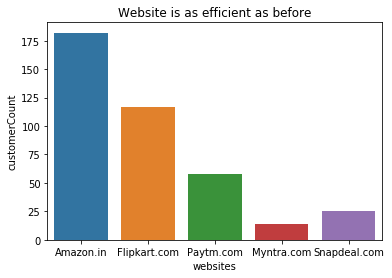

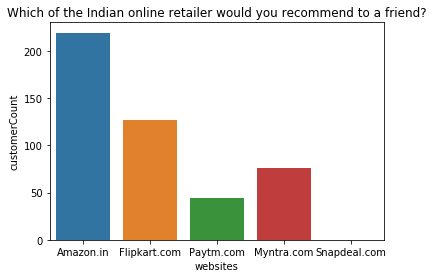

In [47]:
#Extracting feature wise comparison from positive feedback dataframe and plotting bar plot
for i in b:
    a=positive_df.iloc[i:i+5,:]
    sns.barplot(x='websites',y='customerCount',data=a)
    plt.title(a['columnsName'][i])
    plt.show()
    print("\n")

###### Observations 

1.Many customers have shopped from Amazon and Flipkart

2.Amazon and Flipkart have been named most as easy to use website

3.Amazon and Flipkart have been named as the most visually appealing web page layout and also having wild variety of products.

4.Paytm and Snapdeal had not been given more marks on availability of wild variety of products.

5.Amazon and Flipkart have got more positive feedbacks than other websites with relevant to Complete, relevant description information of products, Fast loading of websites, Reliability of website, quickness to complete purchase, availability of several payment options, speedy order delivery, privacy of customers information, security of customer financial information, etc

6.Paytm has got less feedbacks in perceived trustworthiness, presence of online assistance through multi-channel, speed order delivery.

7.Snapdeal.com has got less number of feedbacks in change of website/application design.

8.Myntra has got the least feedbacks in website as efficient as before, followed by Snapdeal.

9.Only one person has recommended Snapdeal.com overall.

Calculating the percentage wise feedback analysis

Now, we will calculate the percentage of people giving the feedbacks to the website for both positive and negative data

In [48]:
#Adding a new column to the dataframe
positive_df['% user feedbacks']=0
positive_df.sort_values(by='websites',inplace=True)
positive_df.reset_index().drop("index",axis=1).groupby('websites')['customerCount'].max()

websites
Amazon.in       269
Flipkart.com    221
Myntra.com      147
Paytm.com       150
Snapdeal.com    182
Name: customerCount, dtype: int64

Maximum users from each websites/application

In [49]:
#Calculating the percentage for all data
positive_df['% user feedbacks']=(positive_df['customerCount']*100)/269 # Amazon users
positive_df['% user feedbacks']=(positive_df['customerCount']*100)/221 # Flipkart users
positive_df['% user feedbacks']=(positive_df['customerCount']*100)/147 # Myntra users
positive_df['% user feedbacks']=(positive_df['customerCount']*100)/150 # Paytm users
positive_df['% user feedbacks']=(positive_df['customerCount']*100)/182 # Snapdeal users

In [50]:
positive_df.reset_index(drop=True)

,columnsName,websites,customerCount,% user feedbacks
0,"From the following, tick any (or all) of the o...",Amazon.in,269,147.802198
1,Change in website/Application design,Amazon.in,141,77.472527
2,Security of customer financial information,Amazon.in,206,113.186813
3,"Complete, relevant description information of ...",Amazon.in,238,130.769231
4,Reliability of the website or application,Amazon.in,227,124.725275
...,...,...,...,...
80,Availability of several payment options,Snapdeal.com,90,49.450549
81,Speedy order delivery,Snapdeal.com,50,27.472527
82,Security of customer financial information,Snapdeal.com,100,54.945055
83,Wild variety of product on offer,Snapdeal.com,14,7.692308


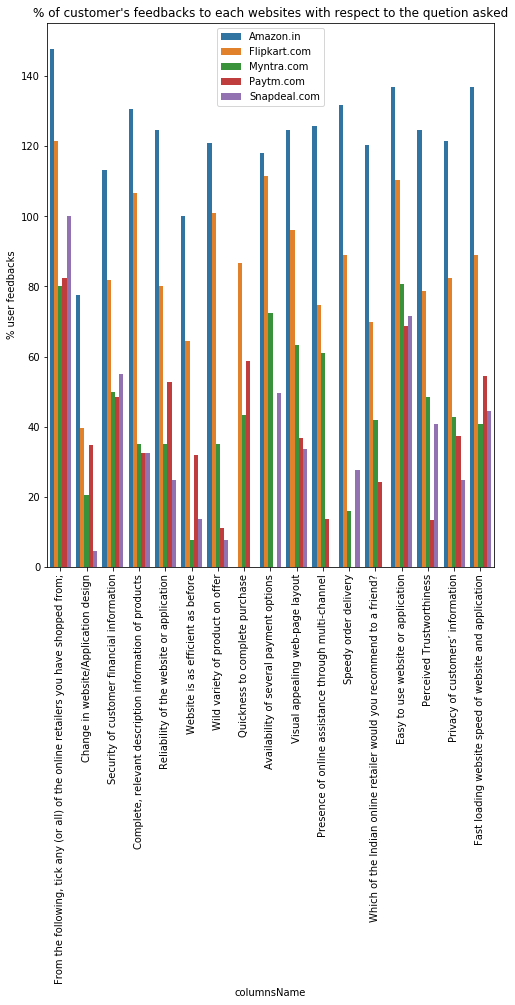

In [96]:
fig=plt.figure(figsize=(8,10))
sns.barplot(positive_df['columnsName'],positive_df['% user feedbacks'],hue=positive_df['websites'])
plt.title("% of customer's feedbacks to each websites with respect to the quetion asked")
plt.xticks(rotation=90)
plt.legend(loc=0)
plt.show()
fig.savefig("% of customer's feedbacks to each websites with respect to the quetion asked.png")

mostly customers are using Amazon, and this websites has change in website/application,Security of information for customer financial information, Complete, relevamt description information of the products, amazon websites is as efficient before, has wild variety of product offers, has Visual appealing web-page layout, as presence of online assistance through multi-channel, has sppedy order delivery, customers recommend amazon to their friends because they are easy to use, and are perceived trustworthiness, keeps privacy of customer information and is fast loading websit/application.

flipkart has highest qickness to complete purchase

amazon and flipkart has highest avalibality of several payments options.

In [51]:
#Sorting values in Descending order
new_positive=positive_df.sort_values(by=['% user feedbacks'],ascending=False)
new_positive

,columnsName,websites,customerCount,% user feedbacks
0,"From the following, tick any (or all) of the o...",Amazon.in,269,147.802198
25,Fast loading website speed of website and appl...,Amazon.in,249,136.813187
5,Easy to use website or application,Amazon.in,249,136.813187
45,Speedy order delivery,Amazon.in,240,131.868132
20,"Complete, relevant description information of ...",Amazon.in,238,130.769231
...,...,...,...,...
39,Quickness to complete purchase,Snapdeal.com,0,0.0
47,Speedy order delivery,Paytm.com,0,0.0
42,Availability of several payment options,Paytm.com,0,0.0
35,Quickness to complete purchase,Amazon.in,0,0.0


In [52]:
new_positive[0:20]

,columnsName,websites,customerCount,% user feedbacks
0,"From the following, tick any (or all) of the o...",Amazon.in,269,147.802198
25,Fast loading website speed of website and appl...,Amazon.in,249,136.813187
5,Easy to use website or application,Amazon.in,249,136.813187
45,Speedy order delivery,Amazon.in,240,131.868132
20,"Complete, relevant description information of ...",Amazon.in,238,130.769231
65,Presence of online assistance through multi-ch...,Amazon.in,229,125.824176
30,Reliability of the website or application,Amazon.in,227,124.725275
10,Visual appealing web-page layout,Amazon.in,227,124.725275
60,Perceived Trustworthiness,Amazon.in,227,124.725275
50,Privacy of customers’ information,Amazon.in,221,121.428571


In [53]:
new_positive[20:40]

,columnsName,websites,customerCount,% user feedbacks
75,Website is as efficient as before,Amazon.in,182,100.0
11,Visual appealing web-page layout,Flipkart.com,175,96.153846
46,Speedy order delivery,Flipkart.com,162,89.010989
26,Fast loading website speed of website and appl...,Flipkart.com,162,89.010989
36,Quickness to complete purchase,Flipkart.com,158,86.813187
51,Privacy of customers’ information,Flipkart.com,150,82.417582
2,"From the following, tick any (or all) of the o...",Paytm.com,150,82.417582
56,Security of customer financial information,Flipkart.com,149,81.868132
8,Easy to use website or application,Myntra.com,147,80.769231
31,Reliability of the website or application,Flipkart.com,146,80.21978


Observations from positive feedback:

1.Flipkart ranks about 90% in satisfying customers, followed by myntra.

2.The maximum percentage paytm and snapdeal could score here is 83 and 71 respectively.

3.No one is willing to refer snapdeal to their contacts as it has the less percentage among all websites.

4.On an average, snapdeal and paytm scores are less when compared to amazon, flipkart and myntra.

In [54]:
#Negative feedback data
negative_df

,columnsName,websites,customerCount,% user feedbacks
0,"Longer time to get logged in (promotion, sales...",Amazon.in,135,0
20,Limited mode of payment on most products (prom...,Amazon.in,104,0
25,Longer delivery period,Amazon.in,37,0
15,"Longer page loading time (promotion, sales per...",Amazon.in,68,0
5,Longer time in displaying graphics and photos ...,Amazon.in,126,0
30,Frequent disruption when moving from one page ...,Amazon.in,78,0
10,"Late declaration of price (promotion, sales pe...",Amazon.in,56,0
16,"Longer page loading time (promotion, sales per...",Flipkart.com,61,0
26,Longer delivery period,Flipkart.com,44,0
21,Limited mode of payment on most products (prom...,Flipkart.com,60,0


In [64]:
#As there are less number of negative feedbacks, we will calculate the people count percentage first
for i in range(0,35,5):
    negative_df['Percentage']=(negative_df['customerCount']*100)/(negative_df.iloc[i:i+5,2].sum())
    
negative_df   

,columnsName,websites,customerCount,% user feedbacks,Percentage
0,"Longer time to get logged in (promotion, sales...",Amazon.in,135,0,43.13099
20,Limited mode of payment on most products (prom...,Amazon.in,104,0,33.226837
25,Longer delivery period,Amazon.in,37,0,11.821086
15,"Longer page loading time (promotion, sales per...",Amazon.in,68,0,21.72524
5,Longer time in displaying graphics and photos ...,Amazon.in,126,0,40.255591
30,Frequent disruption when moving from one page ...,Amazon.in,78,0,24.920128
10,"Late declaration of price (promotion, sales pe...",Amazon.in,56,0,17.891374
26,Longer delivery period,Flipkart.com,44,0,14.057508
1,"Longer time to get logged in (promotion, sales...",Flipkart.com,103,0,32.907348
6,Longer time in displaying graphics and photos ...,Flipkart.com,94,0,30.031949


In [65]:
#We will now calculate the percentage of feedbacks in terms of websites
negative_df['% user feedbacks']=0

negative_df.sort_values(by='websites',inplace=True)
negative_df.reset_index()

,index,columnsName,websites,customerCount,% user feedbacks,Percentage
0,0,"Longer time to get logged in (promotion, sales...",Amazon.in,135,0,43.13099
1,20,Limited mode of payment on most products (prom...,Amazon.in,104,0,33.226837
2,25,Longer delivery period,Amazon.in,37,0,11.821086
3,15,"Longer page loading time (promotion, sales per...",Amazon.in,68,0,21.72524
4,5,Longer time in displaying graphics and photos ...,Amazon.in,126,0,40.255591
5,30,Frequent disruption when moving from one page ...,Amazon.in,78,0,24.920128
6,10,"Late declaration of price (promotion, sales pe...",Amazon.in,56,0,17.891374
7,31,Frequent disruption when moving from one page ...,Flipkart.com,62,0,19.808307
8,11,"Late declaration of price (promotion, sales pe...",Flipkart.com,43,0,13.738019
9,21,Limited mode of payment on most products (prom...,Flipkart.com,60,0,19.169329


In [66]:
#We will now calculate the percentage of feedbacks in terms of websites
negative_df['% user feedbacks']=0
negative_df.sort_values(by='websites',inplace=True)
negative_df.reset_index().groupby("websites")['customerCount'].max()

websites
Amazon.in       135
Flipkart.com    103
Myntra.com       75
Paytm.com        98
Snapdeal.com    109
Name: customerCount, dtype: int64

In [67]:
#Calculating the percentage for all data
negative_df['% user feedbacks']=(negative_df['customerCount']*100)/135 # Amazon users
negative_df['% user feedbacks']=(negative_df['customerCount']*100)/103 # Flipkart users
negative_df['% user feedbacks']=(negative_df['customerCount']*100)/75 # Myntra users
negative_df['% user feedbacks']=(negative_df['customerCount']*100)/98 # Paytm users
negative_df['% user feedbacks']=(negative_df['customerCount']*100)/109 # Snapdeal users

In [68]:
negative_df.sort_values(by=['% user feedbacks','websites'],ascending=False)

,columnsName,websites,customerCount,% user feedbacks,Percentage
0,"Longer time to get logged in (promotion, sales...",Amazon.in,135,123.853211,43.13099
5,Longer time in displaying graphics and photos ...,Amazon.in,126,115.59633,40.255591
24,Limited mode of payment on most products (prom...,Snapdeal.com,109,100.0,34.824281
20,Limited mode of payment on most products (prom...,Amazon.in,104,95.412844,33.226837
1,"Longer time to get logged in (promotion, sales...",Flipkart.com,103,94.495413,32.907348
27,Longer delivery period,Paytm.com,98,89.908257,31.309904
17,"Longer page loading time (promotion, sales per...",Paytm.com,94,86.238532,30.031949
6,Longer time in displaying graphics and photos ...,Flipkart.com,94,86.238532,30.031949
9,Longer time in displaying graphics and photos ...,Snapdeal.com,92,84.40367,29.392971
29,Longer delivery period,Snapdeal.com,90,82.568807,28.753994


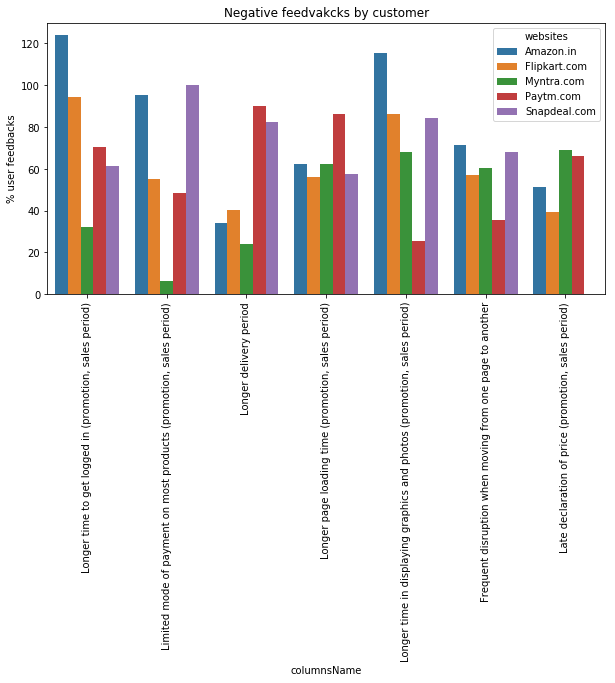

In [75]:
fig=plt.figure(figsize=(10,5))
sns.barplot(negative_df['columnsName'],negative_df['% user feedbacks'],hue=negative_df['websites'])
plt.xticks(rotation=90)
plt.title("Negative feedvakcks by customer")
plt.show()
fig.savefig("Negative feedbacks by customer.png")

#### Observations:

Mostly amazon customer got longer time to logged in and amazon tkes longer time in displaying graphics and photos.

snapdeal has most limited mode for products transaction.

Paytm Custoer got long term delivery period and long page loading.

amazon and snapdeal has takes frequent disruption when moves from one page to another.

Myntra and paytm has late declaration of product Price.


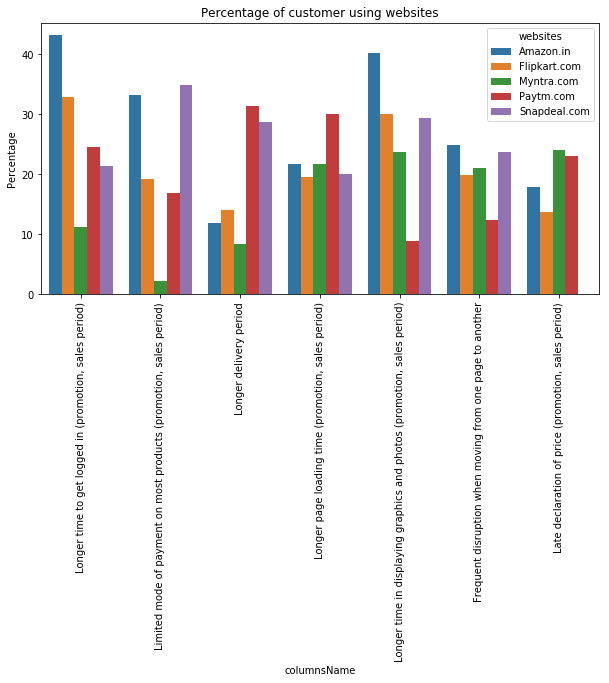

In [74]:
fig=plt.figure(figsize=(10,5))
sns.barplot(negative_df['columnsName'],negative_df['Percentage'],hue=negative_df['websites'])
plt.xticks(rotation=90)
plt.title("Percentage of customer using websites")
plt.show()
fig.savefig("Percentage of customer using websites.png")

### Conclusion Individual recommendations and feedbacks to the websites

Amazon.com To be improved: During promotions, try to give a disturbance free shopping experience to customers. Give more payment options to customers. Try to give price early during promotion. Reduce the delivery time of the products.
Positive feedback summary: Convenient to use and also a good website for shopping. Fast delivery of products. Availability of complete information of the products. Presence of online assistance through multi-channels. Reliable website or app, perceived trustworthiness.

Flipkart.com To be improved: During promotions, try to give a disturbance free shopping experience to customers. Give more payment options to customers. Try to give the price early during promotion. Reduce the delivery time of the products. Flipkart and Amazon almost share the same feedbacks with varying percentages as the only difference.
Positive feedback summary: Convenient to use and also a good website for shopping. Fast delivery of products. Availability of complete information of the products. Presence of online assistance through multi-channels. Reliable website or app, perceived trustworthiness. Wild variety of products to offer.

Myntra.com To be improved: During promotions, try to give a disturbance free shopping experience to customers. Try to give the price early during promotions. Reduce the delivery time of the products during promotions.
Positive feedback summary: Convenient to use and also a good website. Availability of several payment options. Faster products delivery. Complete information of products available. Reliable website or app, perceived trustworthiness. Wild variety of product to offer

Paytm.com To be improved: Reduce the delivery time of the products during promotions. Try to give the price early during promotion. During promotions, try to give a disturbance free shopping experience to customers. Late declaration of price and discounts. Frequent disturbance is occurring while moving from one page to another.
Positive feedback summary Convenient to use and a good website. Quickness to complete a purchase. About 64% of the customers feel that either web or app is reliable. Around 20% of the customers believe that paytm has a wild variety of products on offer.

Snapdeal.com To be improved: Reduce the delivery time of the products during promotions. Try to give the price early during promotion. During promotions, try to give a disturbance free shopping experience to customers. Late declaration of price and discounts. No one has expressed to recommend snapdeal to a contact as it has the most negative feedbacks among all other websites.
Positive feedback summary: Convenient to use. 54% of the customers are happy about the availability of financial information security.

General suggestions and recommendations to all the e-commerce websites

Improve the experience of shopping for customers, as there is a lot of scope in enhancing the shopping experience to the customers using AI. Contuinue giving more financial benefits like coupons, cashbacks, etc. as customers are very much attracted to it. Trustworthiness and approachability through various channels is still highly rated by customers. Majority of the customers are working class women and their age is between 20-40. Always bring variety of products targetting them. Provide more customer friendly approach like fast delivery, complaint resolution, etc.

Therefore, we had analysed the given dataset by using various data analysis process and also we had concluded the analysis by observing the positive and negative feedbacks obtained. We recommended some suggestions for the websites to improve further in the future.